# E-Commerce Customer Churn Analysis
### by Tamara Coglitore

#### **Outline**

- Business Problem
- Data Understanding
- Data Cleaning
- Data Analysis
- Data Preprocessing and Feature Engineering
- Modeling
- Conclusion and Recommendation

## Business Problem


**Latar Belakang**  
  
Pada era modern ini, retensi pelanggan merupakan faktor penting dalam kelangsungan bisnis untuk bersaing dengan kompetitor. Sebuah riset mengatakan peningkatan retensi pelanggan 5% saja dapat meningkatkan 25% laba [(Fred Reichheld)](https://media.bain.com/Images/BB_Prescription_cutting_costs.pdf), dan pelanggan loyal menghabiskan 67% lebih pada bulan 31-36 dibanding bulan 0-6 [(Fred Reichheld)](https://media.bain.com/Images/Value_online_customer_loyalty_you_capture.pdf). Selain itu, untuk memperoleh pelanggan baru dapat menghabiskan biaya lima kali lebih banyak daripada mempertahankan pelanggan yang sudah ada [(Amy Gallo, 2014)](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers).     

Hal diatas menegaskan bahwa setiap bisnis perlu memelihara hubungan dengan pelanggan loyal, tidak terkecuali pada perusahan E-commerce. Sebuah perusahaan E-commerce ingin melakukan evaluasi pelanggan yang meninggalkan layanan dalam waktu tertentu atau biasa disebut dengan *customer churn*. Apabila pelanggan loyal berpaling, dapat merugikan karena biaya yang dikeluarkan perusahaan bisa 16 kali lebih banyak untuk membawa pelanggan baru ke tingkat yang sama dengan pelanggan loyal. Dengan mengetahui pelanggan mana yang akan berpaling, perusahaan dapat menyesuaikan strategi marketing dan memberikan perlakuan khusus terhadap kelompok pelanggan tersebut.

**Pernyataan Masalah**  
  
Pelanggan loyal yang *churn* dapat merugikan perusahaan apabila tidak dihiraukan, untuk itu perusahaan perlu mempertahankan aktivitas pelanggan loyal di platform E-commerce. Salah satu cara yang dapat dilakukan adalah memberikan promosi. Namun, biaya dan sumber daya yang dikeluarkan menjadi kurang efektif apabila promosi dilakukan tanpa strategi. 


**Tujuan**  
  
Berdasarkan permasalahan diatas, perusahaan dapat melakukan tindakan preventif yaitu dengan prediksi *customer churn*. Dengan mengetahui pelanggan yang berpotensi untuk *churn*, strategi pemasaran yang diberikan lebih tepat sasaran. Hal ini dapat menurunkan biaya marketing dan diharapkan dapat meningkatkan profit dengan mempertahankan pelanggan loyal.

Selain itu, dengan mengetahui faktor apa saja yang mempengaruhi pelanggan *churn* dapat menjadi pendukung pengambilan keputusan strategi pemasaran.

**Pendekatan Analitik**  
  
Pendekatan analitik yang dilakukan berupa pembuatan, evaluasi, dan implementasi model machine learning klasifikasi yang dapat memprediksi apabila pelanggan akan *churn* atau tidak berdasarkan riwayat data sebelumnya. 

**Metrik Evaluasi**



|       | N-Pred| P-Pred |
| --- | --- | --- |
| **N-Act**     | TP | FP |
| **P-Act**      | FN | TP |

Target:   
0 : Pelanggan tidak *churn*  
1 : Pelanggan *churn*

Type 1 error : False Positive  
Konsekuensi: Mengeluarkan biaya untuk pelanggan yang kurang tepat atau pelanggan yang tidak akan churn. 

Type 2 error : False Negative  
Konsekuensi: Hilangnya pelanggan loyal

Berdasarkan konsekuensinya, langkah yang tepat untuk pemilihan model adalah model yang mengurangi hilangnya pelanggan loyal, tetapi tetap memperhatikan pengeluaran biaya pemasaran untuk pelanggan yang kurang tepat. Recall dan precision yang diseimbangkan akan dari kelas positif (Pelanggan *churn*). Metrik yang akan digunakan adalah ROC-AUC. 

## Data Understanding


**Sumber Dataset**   
  
https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction  
  
**Penjelasan dataset**  
  
Dataset dibuat oleh Perusahaan E-commerce terkemuka pada tahun 2020. Perusahaan bertujuan untuk mengetahui pelanggan mana yang akan *churn*, sehingga dilakukan pendekatan berupa promo terhadap kelompok pelanggan tersebut. Dataset berisikan profil dan riwayat transaksi pelanggan.


### Attribute Information


In [268]:
# Library

import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.patches as mpatches
import matplotlib.colors

# FE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


# Saving Model
import pickle


In [269]:
# Import Dataset
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [270]:
# Datatype dan Menghitung jumlah dari kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [271]:
# Jumlah baris dan kolom
df.shape

(3941, 11)

In [272]:
# Menunjukkan statistik deskriptif masing-masing kolom
display(df.describe(), df.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


| Attribute | Data Type | Description | Variable Type  |
| --- | --- | --- | --- |
| Tenure | Float | Masa tenure pelanggan | Quant. Kontinu |
| Warehouse to Home | Float | Jarak antara warehouse ke rumah pelanggan | Quant. Kontinu |
| Number of Device | Int | Jumlah perangkat yang terdaftar | Quant. Diskrit |
| Prefered Order Cat | Object | Kategori disukai pelanggan bulan lalu| Qual. (Nominal) |
| Satisfaction Score | Int | Skor kepuasan pelanggan | Qual. (Ordinal) |
| Marital | Object | Status pernikahan pelanggan | Qual. (Nominal) |
| Number of Address | Int | Jumlah alamat yang terdaftar | Quant. Diskrit |  
| Complain | Int | 0 - Tidak Ada complain, 1 - ada complain | Qual. (Nominal)|
| Day Since Last Order | Float | Hari sejak pemesanan terakhir | Quant. Kontinu |
| Cashback Amount | Float | Rata-rata cashback bulan lalu | Quant. Kontinu |
| Churn | Int | 0 - Tidak *churn* , 1 - *Churn* | Qual. (Nominal) | 

Dari data diatas dapat diketahui beberapa hal:  
* Terdapat 3941 baris dan 11 kolom pada dataset
* Data numerik dengan variabel quantitave antara lain Tenure, Warehouse to Home, Number of Device, Number of Address, Day Since Last Order, dan Cashback Amount. Data numerik yang menunjukkan yes or no atau bersifat qualitative adalah complain, dan churn. Data numerik yang menunjukkan qualitative dengan scale ordinal adalah satisfaction score. Data kategorik ada dua antara lain Prefered Order Cat dan Marital. 
* Dari info dataset terlihat ada beberapa missing value, yang akan ditindak-lanjuti di data cleaning


## Data Cleaning

### Data Duplikat dan Typo
Pertama kita ingin mengetahui data unik masing-masing fitur, dan mengetahui apabila ada duplikat atau typo pada dataset. 

In [273]:
# Data unik masing-masing fitur
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].unique()]);

dfDesc = pd.DataFrame(columns=['dataFeatures','unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,unique,uniqueSample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


Dari data diatas dapat dilihat bahwa tidak ada typo. Selain itu, dari fitur kategori yang disukai terdapat 2 kategori yang sama yaitu 'Mobile' dan 'Mobile Phone', sehingga semua baris dengan kategori 'Mobile' pada kolom tersebut akan diganti menjadi 'Mobile Phone'. 

In [274]:
# Menghitung Jumlah per Kategori
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

In [275]:
# Mengubah Mobile menjadi Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone          1446
Fashion                585
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

Setelah kategori sudah disesuaikan, akan dilihat apabila terdapat data duplikat. Karena tidak adanya informasi Customer ID sehingga langkah yang dilakukan adalah melihat setiap baris yang memiliki data yang sama. 

In [276]:
# Melihat Jumlah Data Duplikat
Duplikat = df.duplicated().sum()
PersentaseDup = round((df.duplicated().sum()/df.shape[0])*100,2)
print (f'Data duplikat : {Duplikat}, Persentase Data Duplikat: {PersentaseDup}')

Data duplikat : 672, Persentase Data Duplikat: 17.05


Terdapat 672 data duplikat dari 3941 baris dengan persentase 17,05%. Karena pada dataset **tidak adanya Customer ID** data dianggap benar-benar duplikat. Langkah yang dilakukan untuk menangani data duplikat adalah menghapus baris duplikat. Data duplikat harus dihapus karena dapat mempengaruhi performa model machine learning yang dibuat [(Reference)](https://deepchecks.com/what-is-data-cleaning/), hasil evaluasi data test bisa menjadi bias karena adanya information leakage dari data yang ditraining.

In [277]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)
print(f'shape data: {df.shape}, cek data duplikat: {df.duplicated().sum()}')

shape data: (3269, 11), cek data duplikat: 0


### Missing Value
Setelah membersihkan data duplikat, kita akan melihat apabila ada missing value pada dataset.

In [278]:
# Melihat Missing Value masing-masing kolom
df.isna().sum()

Tenure                      159
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [279]:
# Kalkulasi missing value
print(f'''Jumlah missing value: {df.isnull().sum().sum()}
Jumlah baris dengan missing value: {df[df.isnull().any(axis=1)].shape[0]}
Persentase Baris dengan missing value: {round(df.isnull().sum().sum()/df.shape[0]*100,2)}%''')


Jumlah missing value: 475
Jumlah baris dengan missing value: 475
Persentase Baris dengan missing value: 14.53%


Karena jumlah missing value cukup besar yaitu 14,53%, baris yang berisi missing value tidak akan didrop karena dapat mengurangi jumlah data dan informasi yang diketahui. Semua missing value diatas merupakan data numerik dalam tipe float dengan jenis kontinu. Missing value akan dianalisa lebih lanjut dengan menggunakan package missingno, dengan mengetahui tipe data yang hilang dapat mempermudah pemilihan metode *handling missing value*. Sumber: ([Identifying missingness with missingno.](https://digitaltesseract.com/data-imputation-techniques-an-introduction/))

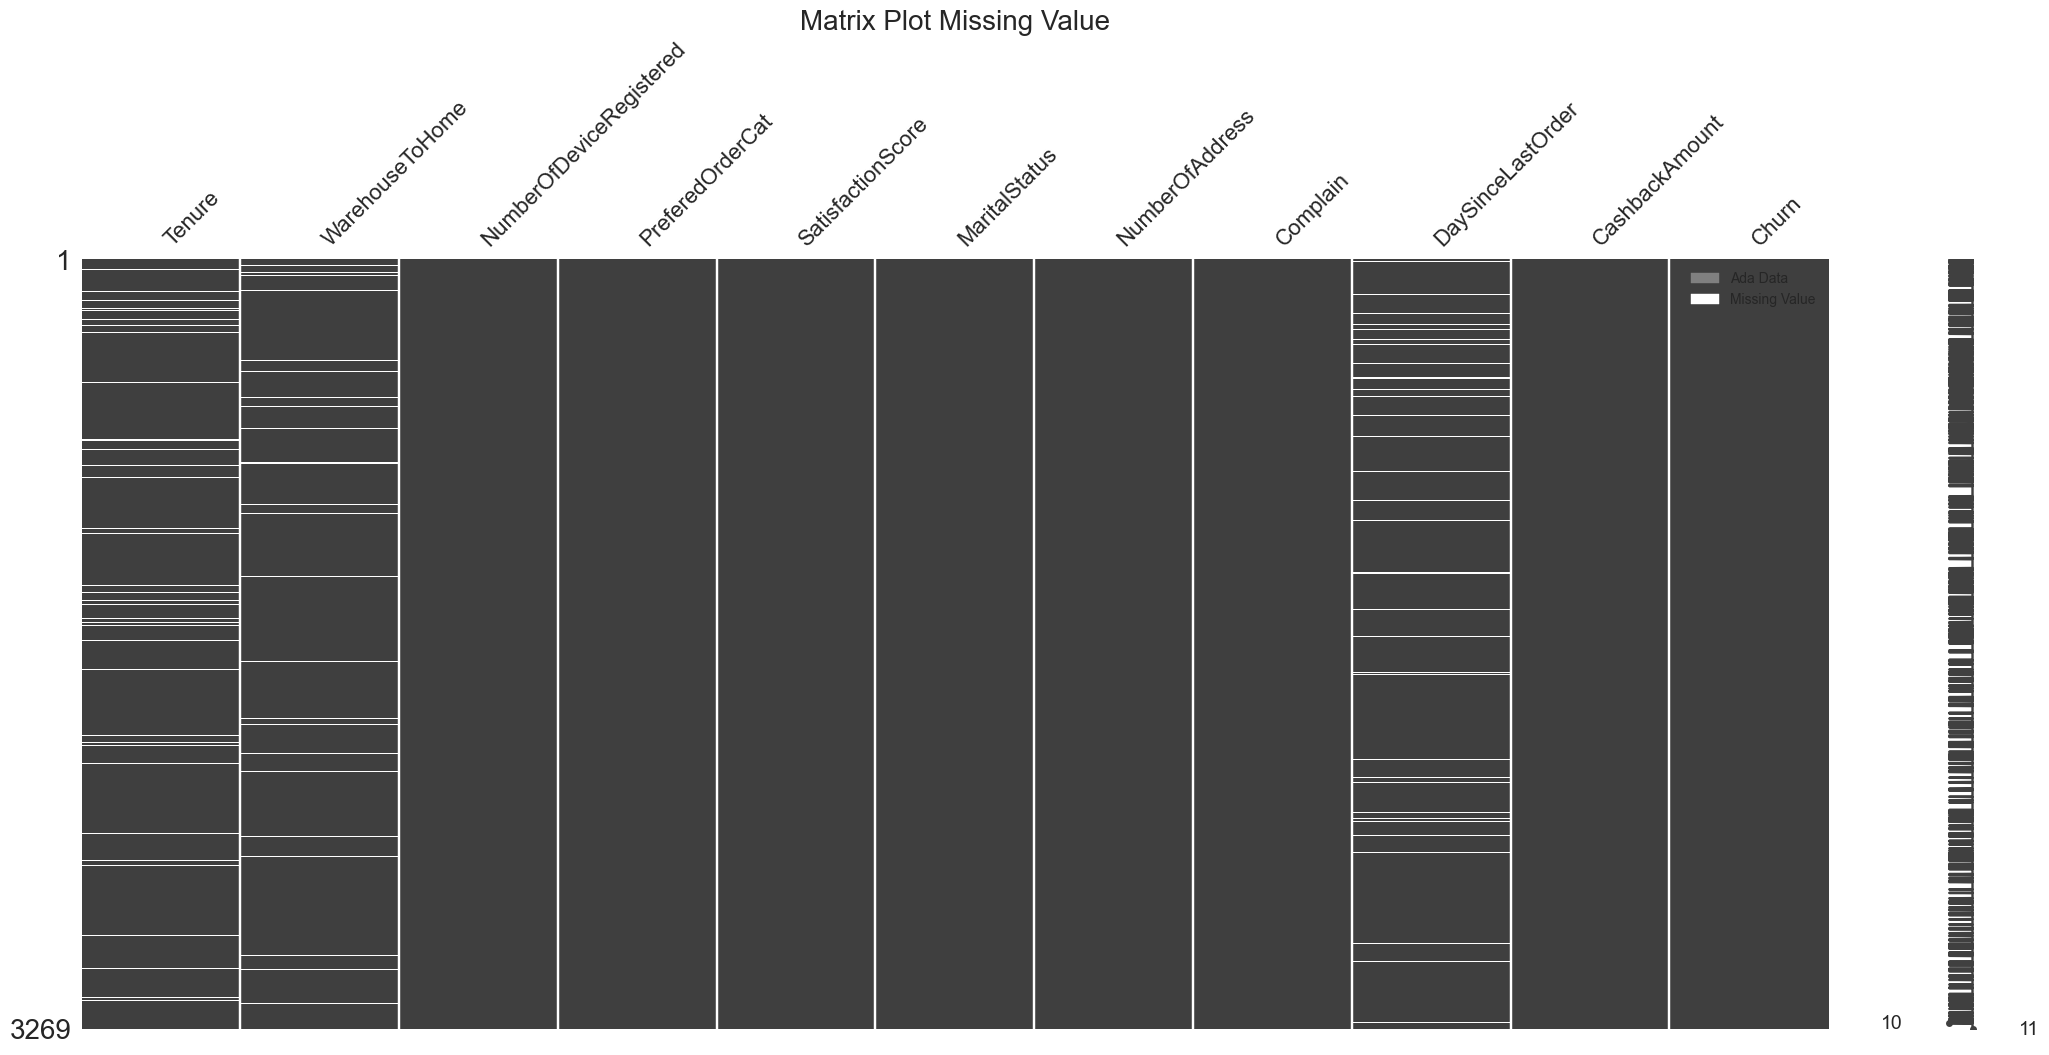

In [280]:
# Melihat missing value dengan matrix plot
msno.matrix(df)
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value', fontsize=20)
plt.show()


Terlihat bahwa missing value tidak menunjukkan pola tertentu dan cukup acak. Dari fitur diatas, variabel yang dapat berpengaruh antara lain SatisfactionScore dan CashbackAmount yang berdampak langsung pada transaksi. Sehingga akan dilakukan sort berdasarkan dua variabel tersebut. 

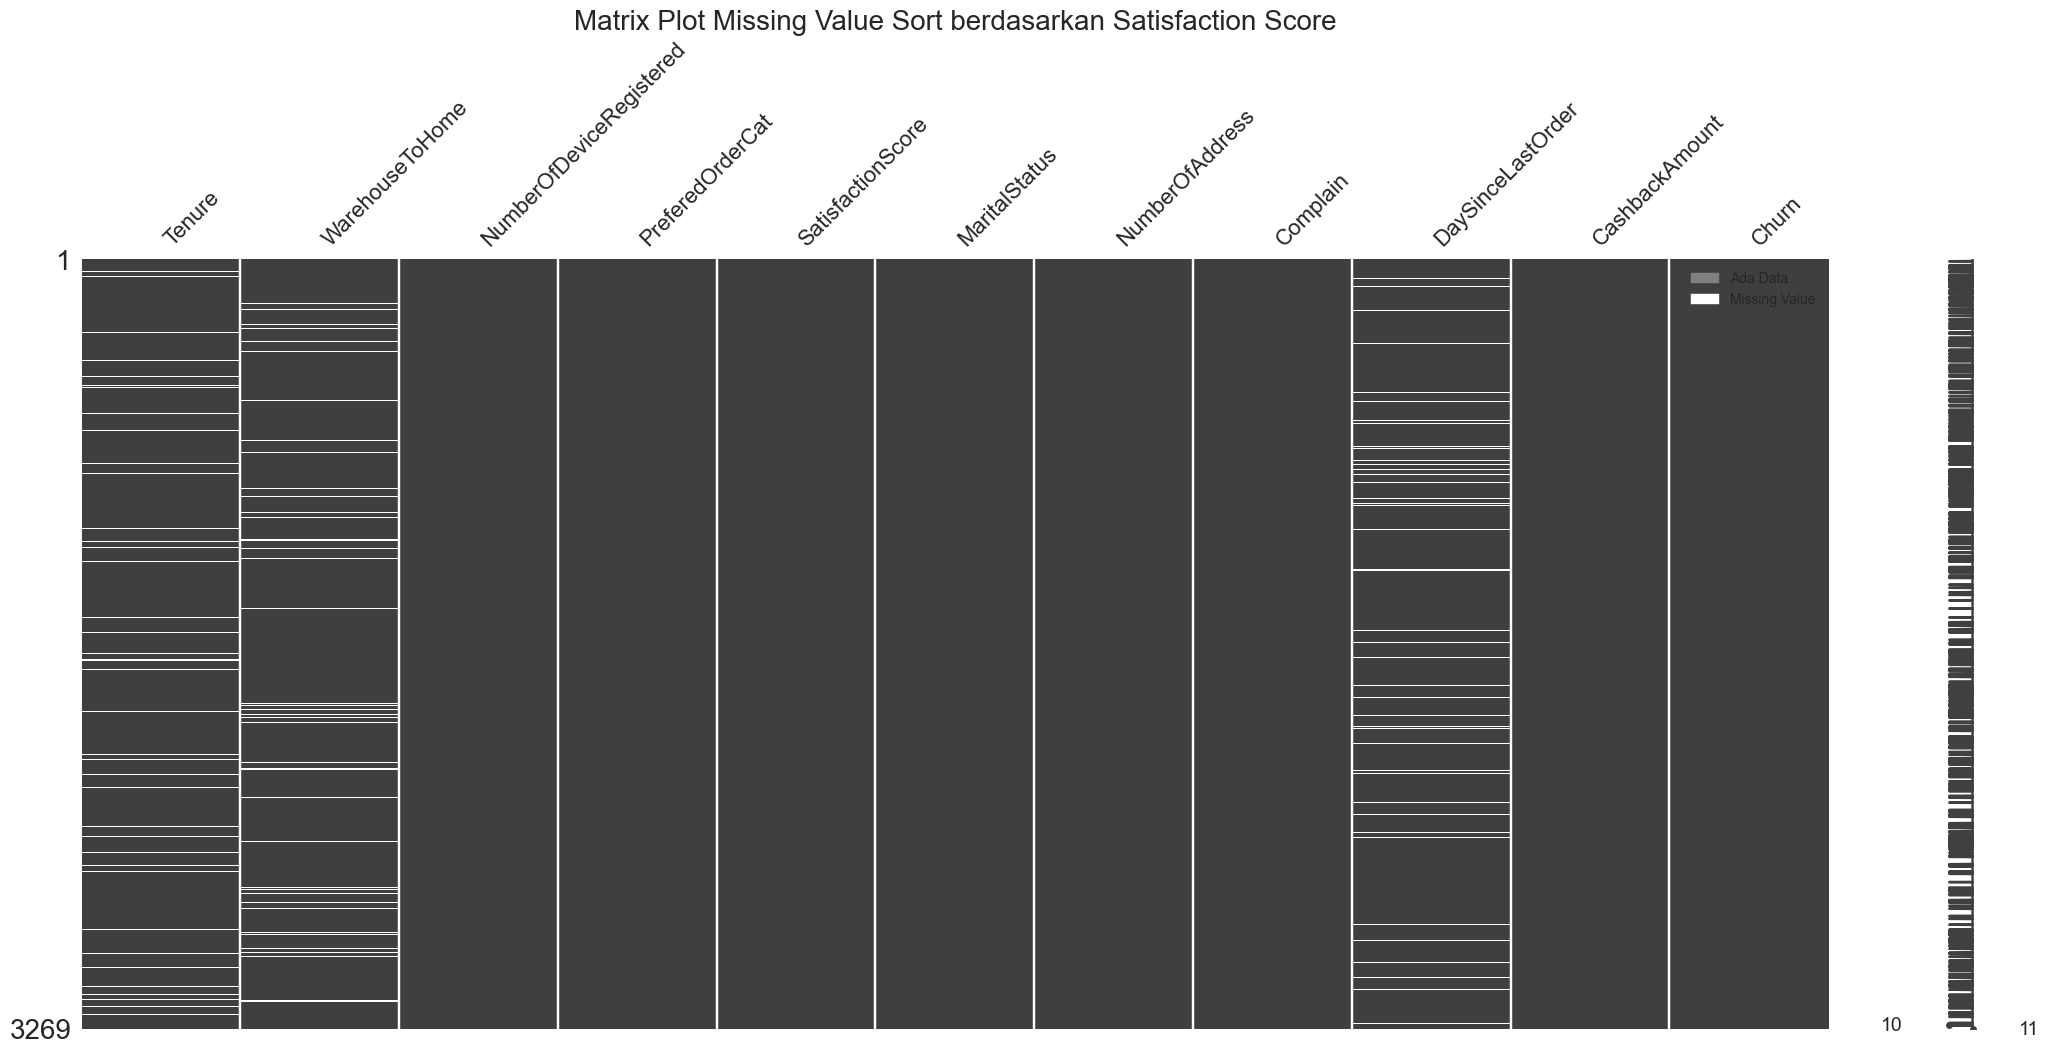

In [281]:
# Matrix missingness berdasarkan satisfaction score
msno.matrix(df.sort_values(by=['SatisfactionScore'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort berdasarkan Satisfaction Score', fontsize=20)
plt.show()

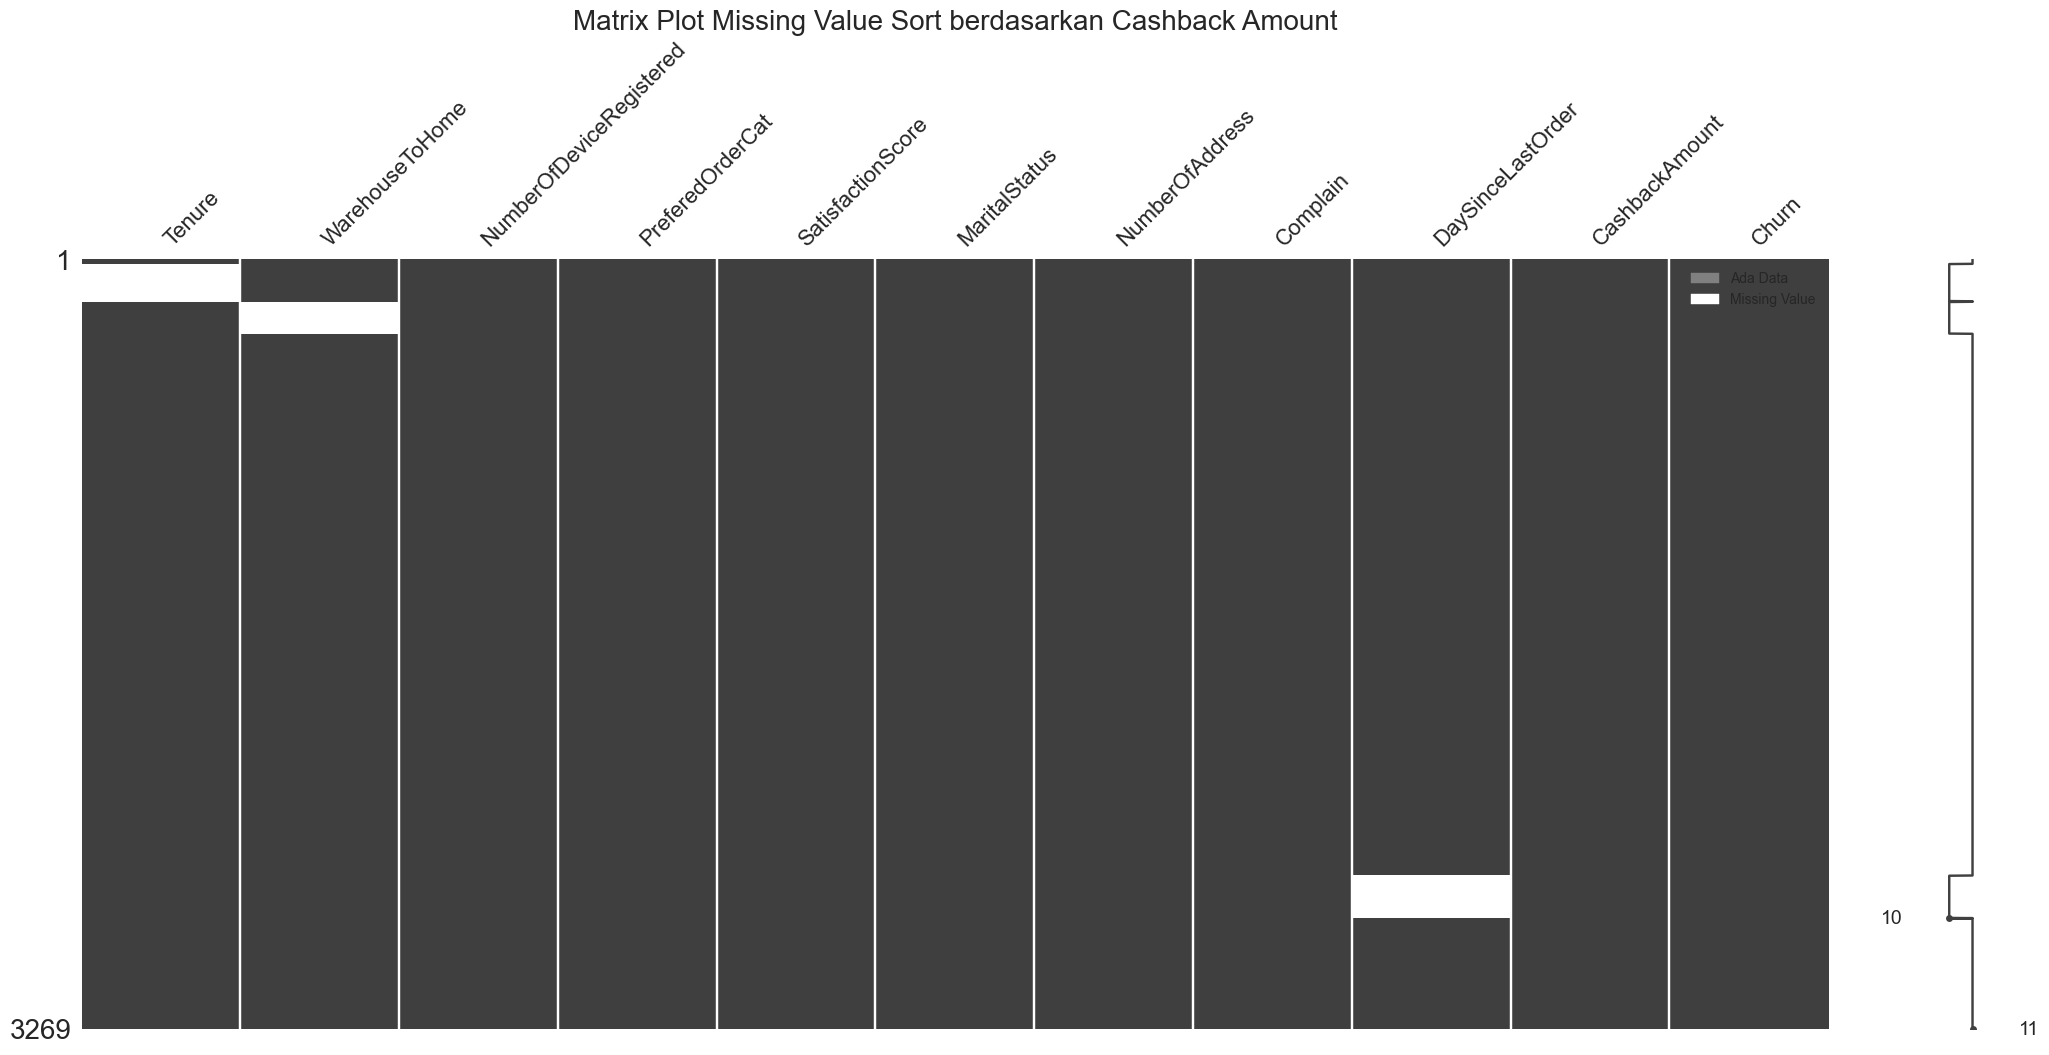

In [282]:
# Matrix missingness berdasarkan satisfaction score
msno.matrix(df.sort_values(by=['CashbackAmount'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort berdasarkan Cashback Amount', fontsize=20)
plt.show()

In [283]:
# Describe kolom missing value berdasarkan tenure
df[df['Tenure'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,0.0,159.000000,159.000000,159,159.000000,159,159.000000,159.000000,159.000000,159.000000,159.000000
unique,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,152,NaN,75,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.408805,3.238994,NaN,3.100629,NaN,3.201258,0.264151,2.150943,120.415535,0.295597
std,NaN,7.680498,0.822616,NaN,1.303331,NaN,2.425549,0.442273,2.413540,2.744332,0.457753
min,NaN,6.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,112.000000,0.000000
25%,NaN,8.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,0.000000,120.280000,0.000000
50%,NaN,13.000000,3.000000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,121.090000,0.000000
75%,NaN,19.000000,4.000000,NaN,4.000000,NaN,4.000000,1.000000,3.000000,122.180000,1.000000


In [284]:
# Describe kolom missing value berdasarkan WarehouseToHome
df[df['WarehouseToHome'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,135.000000,0.0,135.000000,135,135.000000,135,135.000000,135.000000,135.000000,135.000000,135.000000
unique,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,130,NaN,57,NaN,NaN,NaN,NaN,NaN
mean,6.059259,NaN,3.192593,NaN,3.014815,NaN,3.355556,0.303704,2.444444,124.609778,0.333333
std,7.308514,NaN,0.868145,NaN,1.450606,NaN,2.414096,0.461569,2.610732,1.008970,0.473160
min,0.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,123.180000,0.000000
25%,0.000000,NaN,3.000000,NaN,2.000000,NaN,2.000000,0.000000,0.000000,123.720000,0.000000
50%,3.000000,NaN,3.000000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,124.500000,0.000000
75%,10.000000,NaN,4.000000,NaN,4.000000,NaN,5.000000,1.000000,3.000000,125.590000,1.000000


In [285]:
# Describe kolom missing value berdasarkan DaySinceLastOrder
df[df['DaySinceLastOrder'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,181.000000,181.000000,181.000000,181,181.000000,181,181.000000,181.000000,0.0,181.000000,181.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Fashion,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,138,NaN,102,NaN,NaN,NaN,NaN,NaN
mean,11.812155,15.718232,4.077348,NaN,2.883978,NaN,4.850829,0.259669,NaN,220.978232,0.165746
std,8.492354,8.251138,0.933682,NaN,1.434812,NaN,2.585185,0.439669,NaN,6.544886,0.372884
min,0.000000,6.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,NaN,209.340000,0.000000
25%,5.000000,9.000000,4.000000,NaN,1.000000,NaN,3.000000,0.000000,NaN,215.100000,0.000000
50%,10.000000,14.000000,4.000000,NaN,3.000000,NaN,4.000000,0.000000,NaN,221.370000,0.000000
75%,19.000000,19.000000,5.000000,NaN,4.000000,NaN,6.000000,1.000000,NaN,227.210000,0.000000


Dari matrix plot diatas, dapat dilihat bahwa data hilang secara acak (General pattern) tetapi memiliki hubungan dengan variabel CashbackAmount. Hal ini menunjukkan data Missing at Random(MAR) atau terdapat hubungan sistematis antara variabel yang hilang dan variabel lain, tetapi tidak pada variabel yang memiliki missing value itu sendiri. Jika hilangnya tampak acak tetapi ketika Anda menggali lebih dalam dan Anda menemukan hubungan antara fitur yang ada (ini adalah kuncinya), Missing Value adalah MAR [(Sumber)](https://towardsdev.com/how-to-identify-missingness-types-with-missingno-61cfe0449ad9). 
Dari data diketahui beberapa hal:
* Data Tenure yang kosong memiliki range rata-rata cashback dari  112,00 sampai 123,13 
* Data WarehouseToHome yang kosong memiliki range rata-rata cashback dari 123,18 sampai 126,57
* Data DaySinceLastOrder yang kosong memiliki range rata-rata cashback dari 209,34 sampai 231,42
* Setiap Missing value dari masing-masing feature memiliki kesamaan yaitu nilai kategori marital status terbanyak adalah Married

Sehingga akan dianalisa lebih lanjut apabila ada hubungan antara kolom MaritalStatus dengan kolom kosong

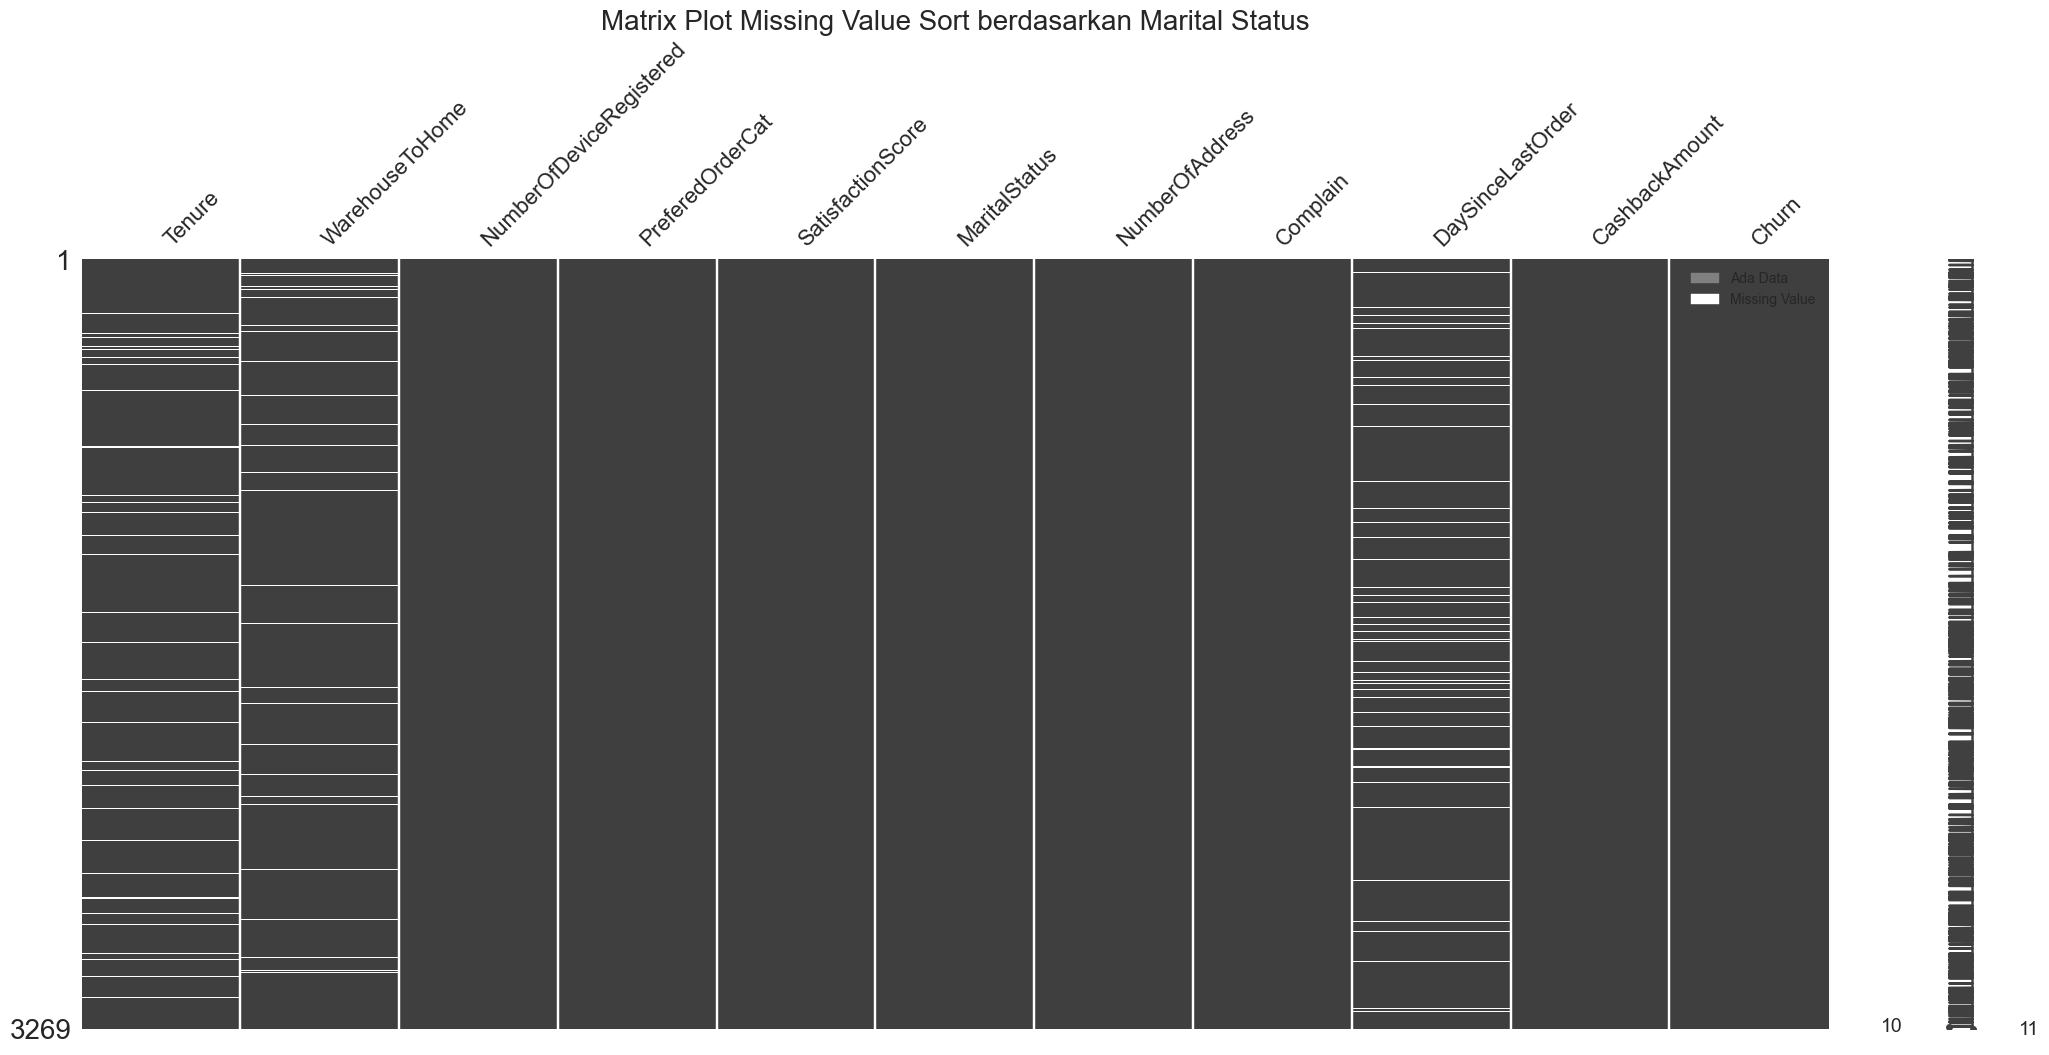

In [286]:
# Matrix missingness berdasarkan Marital Status
msno.matrix(df.sort_values(by=['MaritalStatus'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort berdasarkan Marital Status', fontsize=20)
plt.show()

In [287]:
# Melihat total data hilang dengan kategori Married pada Marital Status
(df[df['MaritalStatus']=='Married'].isna().sum()/df.isna().sum())*100

Tenure                      47.169811
WarehouseToHome             42.222222
NumberOfDeviceRegistered          NaN
PreferedOrderCat                  NaN
SatisfactionScore                 NaN
MaritalStatus                     NaN
NumberOfAddress                   NaN
Complain                          NaN
DaySinceLastOrder           56.353591
CashbackAmount                    NaN
Churn                             NaN
dtype: float64

In [288]:
print(f'''Jumlah data :\n {df['MaritalStatus'].value_counts()}
Persentase data: \n {df['MaritalStatus'].value_counts('Married')*100}''')

Jumlah data :
 Married     1686
Single      1007
Divorced     576
Name: MaritalStatus, dtype: int64
Persentase data: 
 Married     51.575405
Single      30.804527
Divorced    17.620067
Name: MaritalStatus, dtype: float64


Setelah dianalisa lebih lanjut, pada matrix missingness berdasarkan Marital Status tidak menunjukkan pola tertentu, selain itu kolom Marital Status dengan kategori Married memang memiliki proporsi terbanyak pada dataset, sehingga diambil kesimpulan bahwa marital status married tidak memberikan pengaruh pada hilangnya data. 

Kesimpulan yang bisa diambil dari hasil pengamatan tersebut adalah data missing value merupakan MAR dan memiliki hubungan dengan kolom CashbackAmount, metode yang bisa digunakan adalah menggunakan Iterative Imputation karena data berupa multivariate atau dipengaruhi oleh variabel lain. Selain itu handling missing value tidak menggunakan median karena banyaknya data missing yang diubah menjadi median akan menghasilkan total data yang bias dan bisa mempengaruhi model. ([Pemilihan Metode](https://digitaltesseract.com/data-imputation-techniques-an-introduction/)) Sebelum itu akan dilakukan percobaan untuk melihat perbedaan distribusi kolom sebelum dan sesudah dilakukan imputasi pada kolom Tenure, WarehouseToHome, dan DaySinceLastOrder. Hasil yang diharapkan adalah perbedaan distribusi kolom sebelum dan sesudah imputasi tidak terlalu berbeda. 

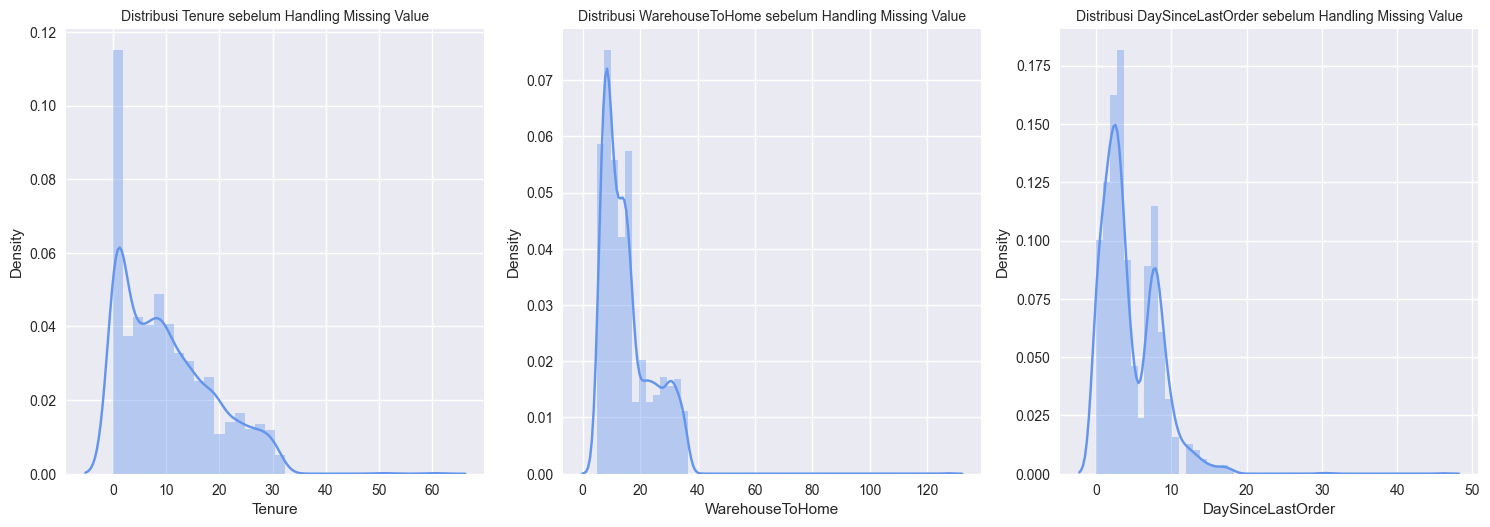

In [289]:
# Percobaan melihat distribusi imputasi dengan iterative imputer (Data sebelum handling missing value)
features = ['Tenure','WarehouseToHome', 'DaySinceLastOrder']
plt.figure(figsize=(15,15))

for i in range(0, len(features)):
  plt.subplot(3, 3, i+1)
  sns.distplot(df[features[i]], color='cornflowerblue')
  plt.tight_layout()
  plt.title(f'Distribusi {features[i]} sebelum Handling Missing Value', fontsize=10)

Text(0.5, 1.0, 'Distribusi Tenure, WarehouseToHome, dan DaySinceLastOrder setelah Handling Missing Value')

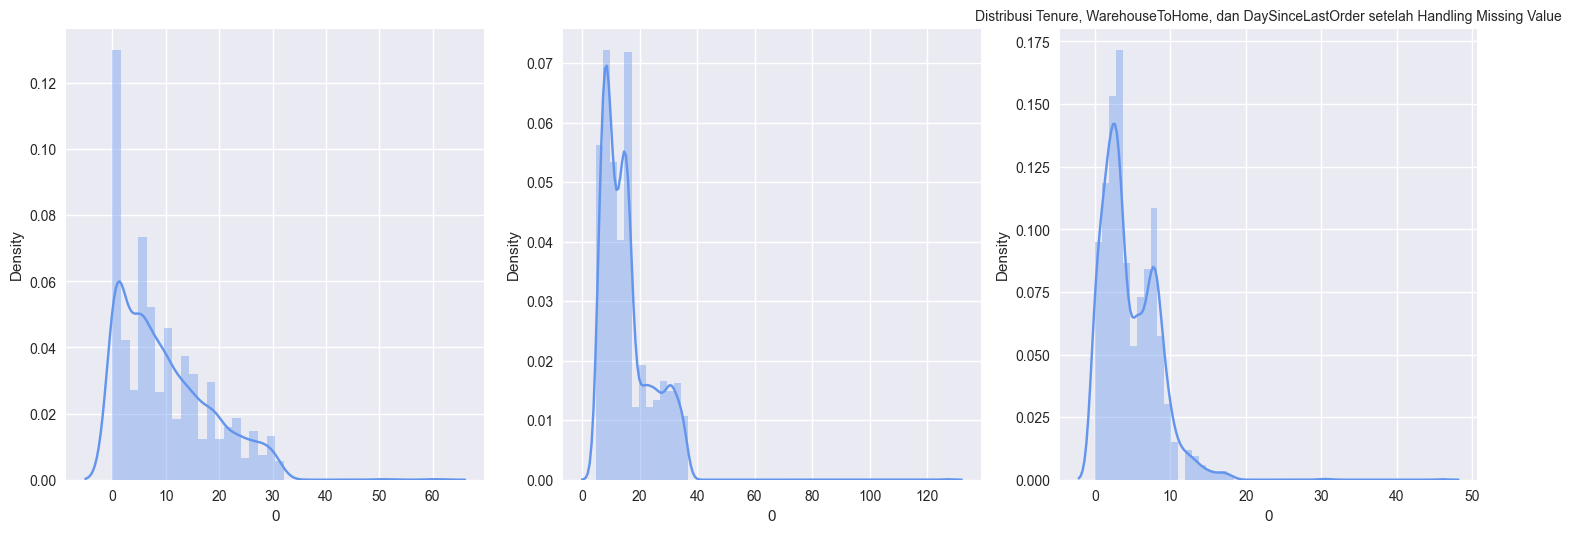

In [290]:
# Melihat distribusi masing-masing data setelah imputasi
imputer = IterativeImputer(random_state=0)
TenureAft = pd.DataFrame(imputer.fit_transform(df[['Tenure','CashbackAmount']]))
WarehouseToHomeAft = pd.DataFrame(imputer.fit_transform(df[['WarehouseToHome','CashbackAmount']]))
DaySinceLastOrderAft = pd.DataFrame(imputer.fit_transform(df[['DaySinceLastOrder','CashbackAmount']]))

ImputerDataFrame = [TenureAft,WarehouseToHomeAft, DaySinceLastOrderAft]
plt.figure(figsize=(15,15))
a=0
for i in ImputerDataFrame:
  plt.subplot(3, 3, a+1)
  sns.distplot(i[0], color='cornflowerblue')
  plt.tight_layout()
  a+=1
plt.title(f'Distribusi Tenure, WarehouseToHome, dan DaySinceLastOrder setelah Handling Missing Value', fontsize=10)

Data sebelum dan setelah imputasi memiliki selisih distribusi yang tidak terlalu berbeda. Handling missing value akan dilakukan pada saat data preprocessing.

### Outlier
Terdapat beberapa model yang sensitif terhadap outlier yang akan digunakan, seperti Logistic Regression, K-Nearest Neighbour, dsb. Sehingga akan dianalisa terkait outlier yang terdapat pada dataset. 

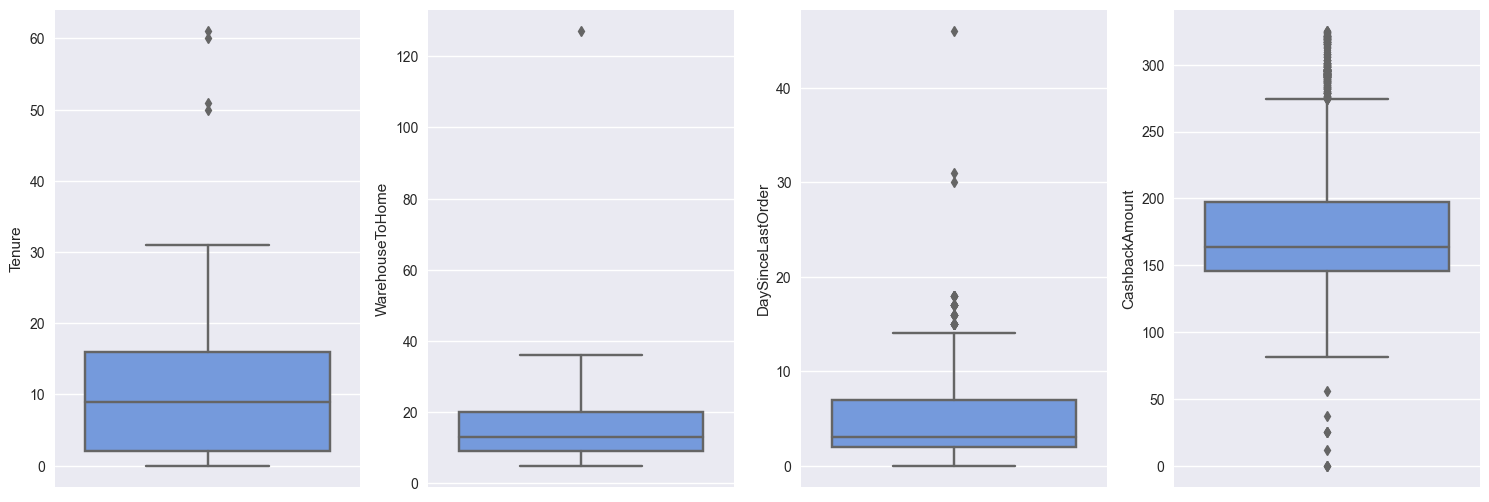

In [291]:
# Melihat outlier menggunakan boxplot pada data kontinu
features = ['Tenure','WarehouseToHome', 'DaySinceLastOrder','CashbackAmount']
plt.figure(figsize=(15,20))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df[features[i]], color='cornflowerblue', orient='v')
  plt.tight_layout()


In [292]:
# Melihat lower bound, upper bound, outlier, dan persentase outlier
for i in range(0, len(features)):
    Q1 = df[features[i]].quantile(0.25)
    Q3 = df[features[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound =  Q1 - (1.5 * IQR)
    upper_bound =  Q3 + (1.5 * IQR)
    condition = (df[features[i]]< lower_bound) | (df[features[i]]> upper_bound)
    outlier = df.loc[condition, features[i]].count()
    PersentaseOutlier = outlier/df[features[i]].count()*100
    print(f'''Lower Bound {features[i]} adalah {round(lower_bound,2)}, dan Upper Bound {features[i]} adalah {round(upper_bound,2)} , terdapat {outlier} data yang menyimpang dari data biasanya, yaitu sebanyak {round(PersentaseOutlier,2)}%''')
    '/n'

Lower Bound Tenure adalah -19.0, dan Upper Bound Tenure adalah 37.0 , terdapat 4 data yang menyimpang dari data biasanya, yaitu sebanyak 0.13%
Lower Bound WarehouseToHome adalah -7.5, dan Upper Bound WarehouseToHome adalah 36.5 , terdapat 1 data yang menyimpang dari data biasanya, yaitu sebanyak 0.03%
Lower Bound DaySinceLastOrder adalah -5.5, dan Upper Bound DaySinceLastOrder adalah 14.5 , terdapat 40 data yang menyimpang dari data biasanya, yaitu sebanyak 1.3%
Lower Bound CashbackAmount adalah 69.04, dan Upper Bound CashbackAmount adalah 274.0 , terdapat 253 data yang menyimpang dari data biasanya, yaitu sebanyak 7.74%


Dari perhitungan diatas, data outlier pada kolom Tenure dan WarehouseToHome akan di drop karena memiliki persentase yang kecil. Sedangkan pada DaySinceLastOrder dan CashbackAmount diabaikan karena dianggap sebagai nilai yang wajar apabila memiliki nilai dengan variansi tinggi. Akan ditindak-lanjuti di bagian preprocessing dengan melakukan binning pada CashbackAmount. 

In [293]:
# Menghapus kolom dengan outlier
df.drop(df[df['Tenure']>37].index,inplace=True)
df.drop(df[df['WarehouseToHome']>36.5].index,inplace=True)

In [294]:
df.shape

(3264, 11)

## Data Analysis

Setelah dilakukan proses data cleaning, akan dilakukan analisa untuk memahami karakteristik pelanggan yang churn. Akan dilihat proporsi pelanggan yang tidak churn dan pelanggan yang churn. 

#### Customer Churn

In [295]:
# Perbandingan pelanggan tidak churn dan churn
df['Churn'].value_counts()

0    2731
1     533
Name: Churn, dtype: int64

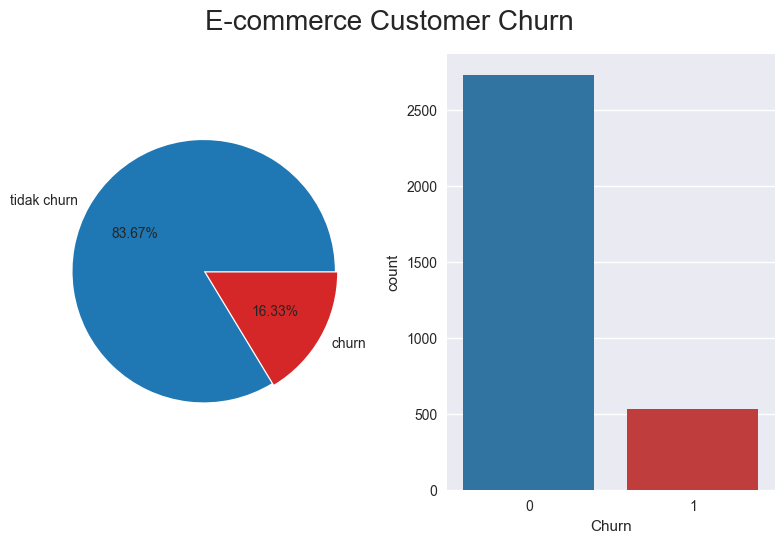

In [296]:
# Perbandingan pelanggan tidak churn dan churn
sns.color_palette('pastel')
plt.figure().suptitle('E-commerce Customer Churn', fontsize=20)
plt.subplot(1,2,1)
plt.pie(df['Churn'].value_counts(), labels=['tidak churn','churn'], colors= ['tab:blue','tab:red'],autopct='%.2f%%',explode=(0.01,0.01))
plt.subplot(1,2,2)
sns.countplot(data=df, x='Churn',palette=['tab:blue',"tab:red"])
sns.color_palette('pastel')
plt.tight_layout()
plt.show()  

Dari data diatas dapat dilihat bahwa dataset merupakan data imbalance karena kelas timpang, dengan proporsi tidak churn 83,67% dan proporsi churn 16.33%. Data imbalance dapat memiliki dampak buruk pada model machine learning yang akan dibuat terutama pada saat memprediksi kelas dengan jumlah yang lebih sedikit atau kelas minoritas. Sehingga akan dilakukan metode resampling SMOTE atau Synthetic Minority Oversampling Technique, yaitu menambah kelas minoritas yang akan dilakukan pada saat modeling.   
  
Analisa selanjutnya akan dilihat pengaruh masing-masing variabel(fitur) terhadap *customer churn*.

#### Berdasarkan variabel numerik - kontinu

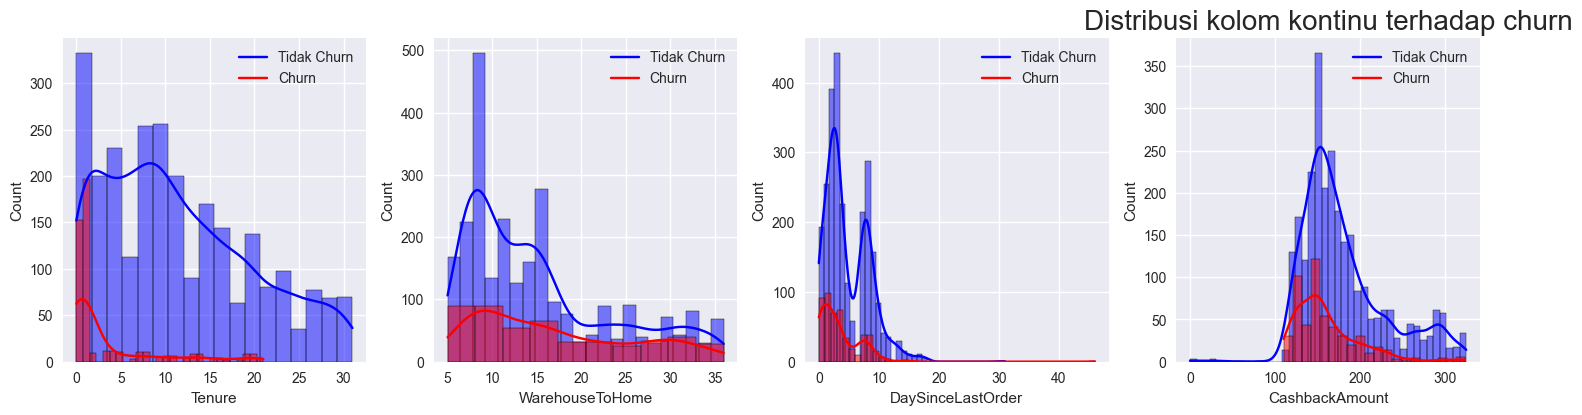

In [297]:
# Distribusi pada kolom kontinu terhadap churn
kontinu= ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
a=1
sns.color_palette('pastel')
plt.figure(figsize=(15,15))
for i in kontinu:
    plt.subplot(4,4,a)
    sns.histplot(x=df[df['Churn']==0][i],kde=True,color='blue')
    sns.histplot(x=df[df['Churn']==1][i],kde=True,color='red')
    plt.legend(labels=['Tidak Churn','Churn'])
    plt.tight_layout()
    a+=1
plt.title('Distribusi kolom kontinu terhadap churn', fontsize=20)
plt.show()

Pada grafik distribusi kontinu diatas terhadap churn, karena proporsi tidak churn memang lebih besar dari churn, sehingga didapat beberapa insight, antara lain:
* Tenure merupakan masa penggunaan platform e-commerce dari pertama mendaftar dalam satuan bulan, semakin kecil bulan penggunaan platform, maka semakin besar pelanggan churn. Terdapat juga fluktuasi pelanggan tidak churn pada bulan 8-11, yang menunjukkan rate pelanggan loyal semakin tinggi di range bulan tersebut.
* WarehouseToHome merupakan jarak antara gudang dengan rumah pelanggan, data pelanggan churn terdistribusi hampir rata. Tetapi selisih pelanggan churn dan tidak churn diatas 20KM sangat kecil, sehingga dapat disimpulkan semakin jauh jarak gudang dengan rumah pelanggan, maka ada kemungkinan pelanggan churn dibanding tidak churn. 
* DaySinceLastOrder pada pelanggan churn dan tidak churn menunjukkan distribusi yang hampir sama. Akan dianalisa lebih lanjut untuk korelasi data daysincelastorder dan churn. 
* CashbackAmount pelanggan churn paling tinggi berada di sekitar 150, dan akan dianalisa lebih lanjut faktornya. 

Selain distribusinya terhadap tidak churn dan churn, akan dilihat distribusi rata-rata pelanggan churn berdasarkan masing-masing variabel.

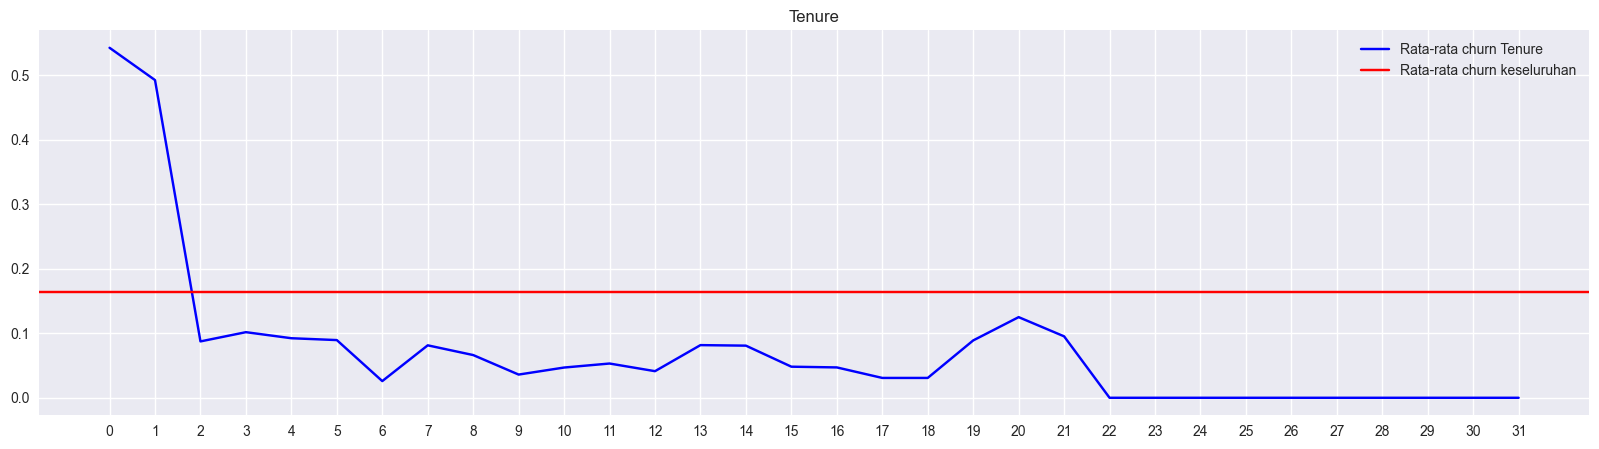

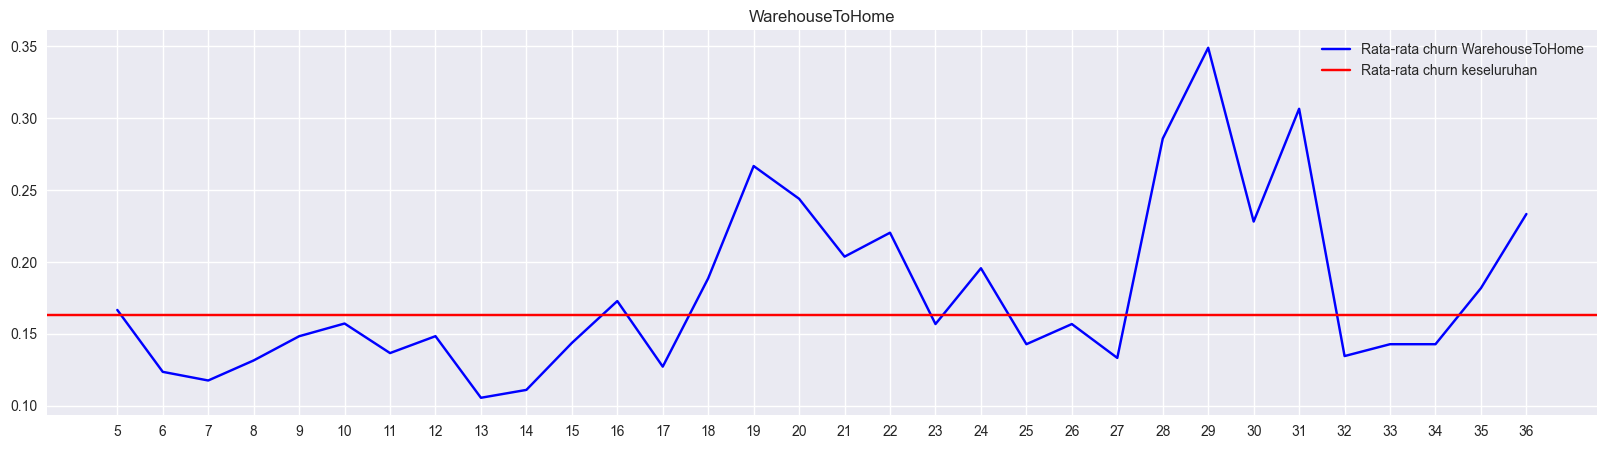

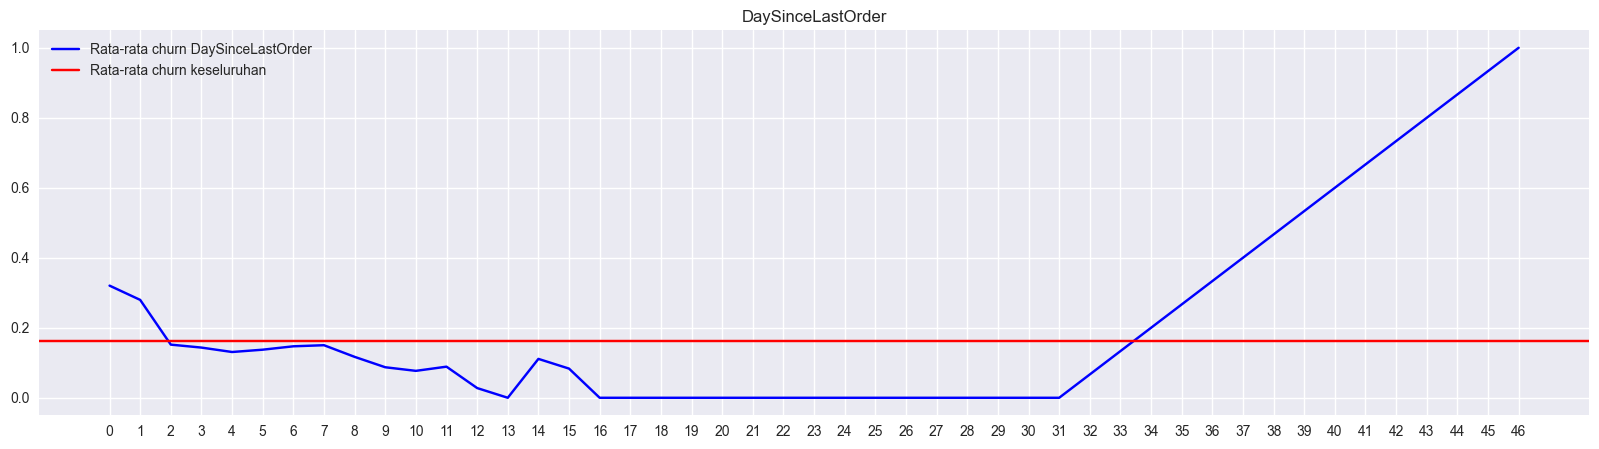

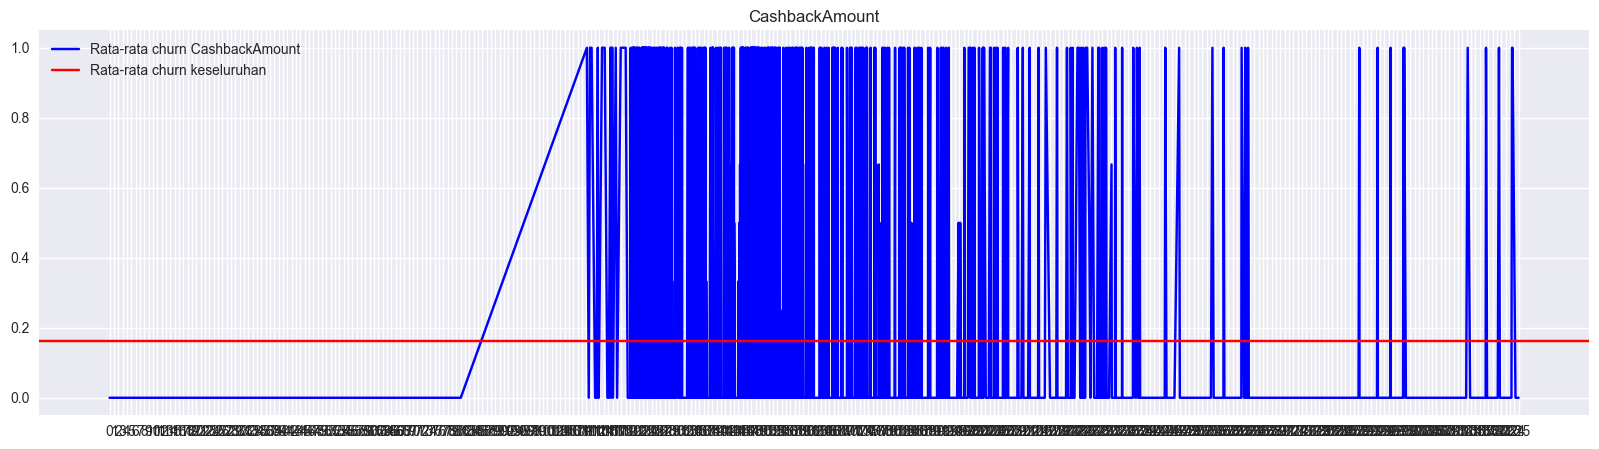

In [298]:
# Churn berdasarkan variabel
ChurnAvg = df[df['Churn']==1]['Churn'].sum()/df.shape[0]
for i in kontinu:
    plt.figure(figsize = (20,5))
    plt.plot(df.groupby(i)['Churn'].mean(), label=(f'Rata-rata churn {i}'),color='b')
    plt.axhline(y = ChurnAvg,label='Rata-rata churn keseluruhan', color='r')
    plt.xticks(np.arange(min(df[i]), max(df[i])+1, 1.0))
    plt.tight_layout
    plt.title(i)
    plt.legend()
    plt.show()


Dari data diatas didapat beberapa hal, antara lain: 
* Pelanggan churn paling tinggi, memiliki masa penggunaan platform e-commerce dari bulan 0 sampai 2. Hal ini mungkin bisa terjadi karena beberapa hal, seperti: 
    * pelanggan masih beradaptasi dengan platform dibulan tersebut dan merasa tidak cocok
    * pelanggan menemukan platform e-commerce lain yang memiliki penawaran lebih menarik
    * tidak menemukan hal lain yang dibutuhkan (Variasi produk kurang)
* Jarak gudang dengan rumah pelanggan diatas 17Km (Asumsi dalam kilometer) menunjukkan tingkat churn yang lebih tinggi, hal ini bisa dipengaruhi oleh naiknya ongkos kirim
* Rata-rata DaySinceLastOrder menunjukkan nilai yang tinggi diatas 31, tetapi hal ini bisa dipengaruhi outlier karena data diatas 31hari sedikit. Rata-rata churn paling banyak adalah di hari 0-2 setelah pembelian, yang mungkin disebabkan karena adanya sesuatu barang yang pelanggan cari sesuai dengan kebutuhan pelanggan di platform, bukan karena ketertarikan terhadap e-commerce itu sendiri. 
* Rata-rata CashbackAmount sulit untuk dilihat karena variansinya yang tinggi, sehingga akan dilakukan pengelompokkan dengan binning pada tahap preprocessing.

#### Berdasarkan variabel numerik Quantitatif diskrit dan numerik Qualitatif

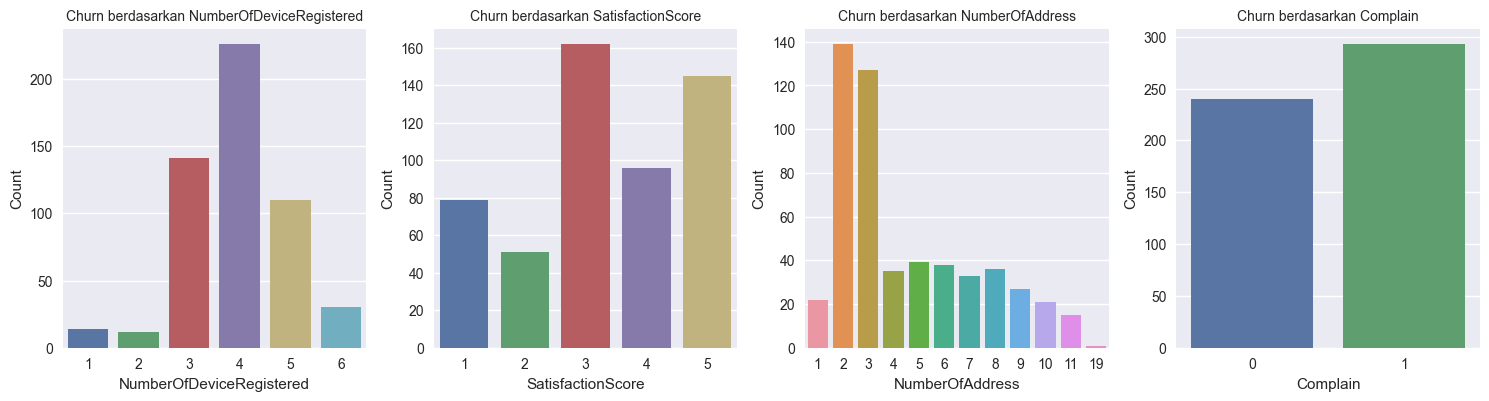

In [299]:
# Melihat pelanggan churn berdasarkan variabel
kolomnum = ['NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain']
a=1
plt.figure(figsize=(15,15))
for i in kolomnum:  
    plt.subplot(4,4,a)
    plt.style.use('seaborn')
    sns.countplot(x=df[df['Churn']==1][i])
    plt.title(f'Churn berdasarkan {i}', fontsize=10)
    plt.ylabel('Count')
    a+=1
    plt.tight_layout()
plt.show()

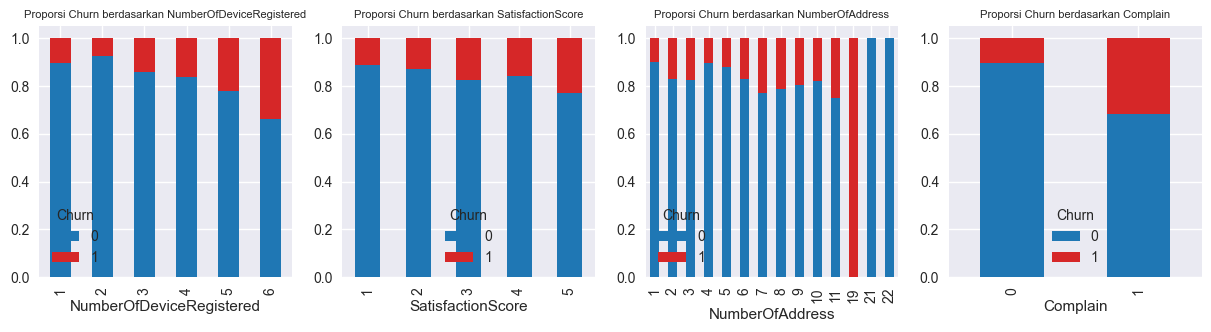

In [300]:
# Visualisasi proporsi churn berdasarkan variabel
a=1
plt.figure(figsize=(15,15))
for i in kolomnum: 
    ax = plt.subplot(4,4,a)
    plt.style.use('seaborn')
    plt.title(f'Proporsi Churn berdasarkan {i}', fontsize=8)
    pd.crosstab(df[i],df['Churn'],normalize='index').sort_index().plot(color=['tab:blue',"tab:red"], kind='bar', stacked=True,ax=ax)
    a+=1
    plt.tight_layout
plt.show()

<AxesSubplot:xlabel='SatisfactionScore'>

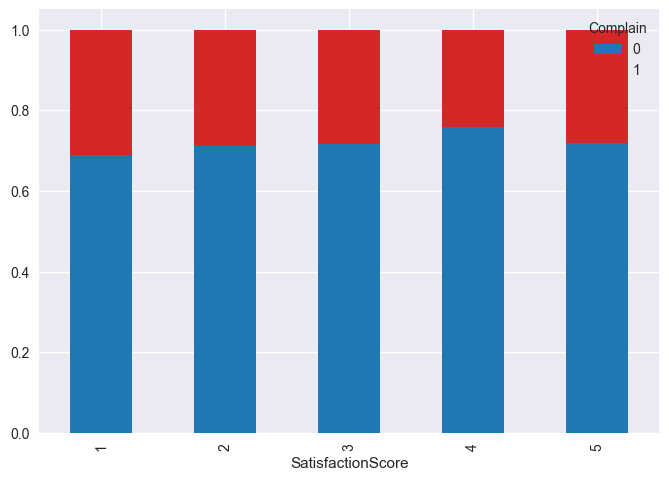

In [301]:
pd.crosstab(df['SatisfactionScore'],df['Complain'],normalize='index').sort_index().plot(color=['tab:blue',"tab:red"], kind='bar',stacked=True)

Dari data diatas diketahui beberapa hal:
* Jumlah pelanggan churn paling banyak memiliki 3-4 device yang terhubung, dan 2-3 alamat. Tetapi berdasarkan proporsi, tingkat churn paling tinggi adalah pada pelanggan dengan 6 perangkat dan 7 alamat tanpa melihat data outlier.
* Proporsi pelanggan churn dengan rate tertinggi menilai kepuasan 5, dan pelanggan yang churn cenderung melakukan complain. Hal ini bisa saja karena pelanggan puas dengan platform e-commerce tetapi ada permasalahan dengan marketplace pada platform.

#### Berdasarkan variabel kategori 

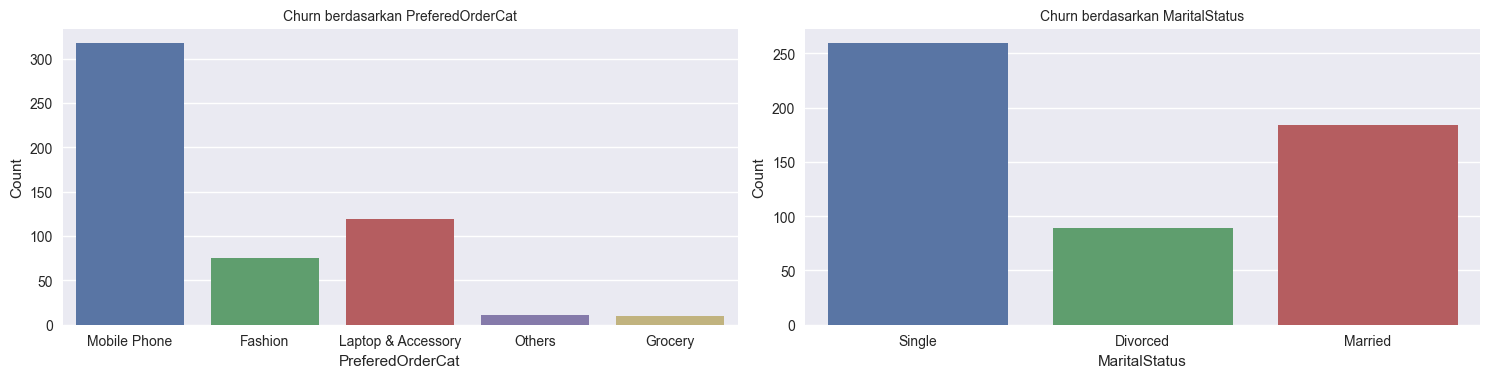

In [302]:
# Karakteristik churn berdasarkan kategori
kat = ['PreferedOrderCat', 'MaritalStatus']
plt.figure(figsize=(15,7))
a=1
for i in kat:  
    plt.subplot(2,2,a)
    plt.style.use('seaborn')
    sns.countplot(x=df[df['Churn']==1][i])
    plt.title(f'Churn berdasarkan {i}', fontsize=10)
    plt.ylabel('Count')
    a+=1
    plt.tight_layout()
plt.show()

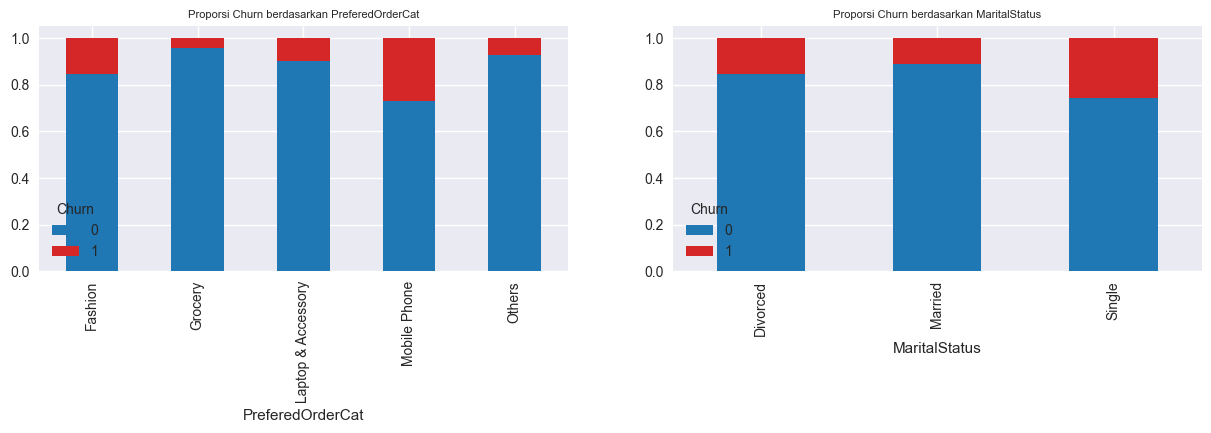

In [303]:
# Visualisasi proporsi churn berdasarkan variabel
a=1
plt.figure(figsize=(15,7))
for i in kat: 
    ax = plt.subplot(2,2,a)
    plt.style.use('seaborn')
    plt.title(f'Proporsi Churn berdasarkan {i}', fontsize=8)
    pd.crosstab(df[i],df['Churn'],normalize='index').sort_index().plot(color=['tab:blue',"tab:red"], kind='bar', stacked=True,ax=ax)
    a+=1
    plt.tight_layout
plt.show()

Dari data diatas dapat dilihat bahwa jumlah dan proporsi pelanggan yang churn cenderung memiliki preferensi order Mobile Phone dan memiliki status single.

## Data Preprocessing and Feature engineering

In [304]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


Setelah memahami data dari data cleaning dan data analisis, akan dilakukan beberapa tahap preprocessing dan feature engineering, antara lain:
* Data CashbackAmount memiliki variansi tinggi dan akan dibuat menjadi suatu kolom kategorik baru dengan binning.
* Melakukan handling missing value dengan IterativeImputer pada kolom `Tenure`, `WarehouseToHome`, `DaySinceLastOrder` sesuai dengan analisa yang dilakukan pada data cleaning
* Melakukan OneHotEncoding pada kolom `MaritalStatus` karena memiliki kategori sedikit(3) dan tidak ada susunan tertentu
* Melakukan BinaryEncoding pada kolom `PreferedOrderCat` karena memiliki kategori yang cukup banyak yaitu 5 jenis yang berbeda, dan tidak ada susunan tertentu
* Melakukan Ordinal Encoding pada kolom `CashbackAmountClass` karena kategori memiliki susunan atau urutan tertentu, dari sangat kecil sampai sangat besar


#### Binning

In [305]:
# Melakukan binning pada kategori cashbackamount
bin_labels= ['Sangat Kecil', 'Kecil', 'Sedang', 'Besar', 'Sangat Besar']
df['CashbackAmountClass']= pd.cut(df['CashbackAmount'], 5,labels = bin_labels)
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,CashbackAmountClass
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0,Sedang
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0,Kecil
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0,Sedang
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0,Besar
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0,Sangat Besar


In [306]:
df.groupby('CashbackAmountClass')['CashbackAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
CashbackAmountClass,,,,,,,,
Sangat Kecil,9.0,20.000000,19.118054,0.00,0.00,25.000,25.0000,56.00
Kecil,429.0,123.620047,4.686553,81.00,121.44,123.800,126.9500,129.96
Sedang,1985.0,160.183703,16.306101,130.22,147.75,157.020,172.6500,194.62
Besar,517.0,220.068221,17.275935,195.05,204.75,218.960,232.4800,259.99
Sangat Besar,324.0,290.180556,18.422611,260.03,273.99,291.895,300.7125,324.99


#### Data splitting

Pertama dilakukan data splitting dengan train test split yang bertujuan untuk mengevaluasi performa model machine learning. Data train 80% dan data test 20% dengan random state 0, dan stratify y yang bertujuan untuk memastikan kedua data memiliki proporsi semua target(churn).

In [307]:
# Membuat fitur x dan target y
x = df.drop(columns=['Churn'])
y = df['Churn']

In [308]:
# Melakukan data splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=0)

#### Handling missing value 

In [309]:
def imputation(x_train, x_test, cont_features):
    imputerCont = IterativeImputer(random_state=0, missing_values=np.nan)
    imputerCont.fit(x_train[cont_features])
    x_train[cont_features] = imputerCont.transform(x_train[cont_features])
    x_test[cont_features] = imputerCont.transform(x_test[cont_features])
    return x_train, x_test

Data train dan data test dilakukan imputasi missing value dengan fungsi yang sudah dibuat.

In [310]:
# Fit&transform missing value imputation
x_train , x_test = imputation(x_train, x_test,kontinu)

In [311]:
# Melihat missing value
print(x_test.isna().sum(), x_test.isna().sum())

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
CashbackAmountClass         0
dtype: int64 Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
CashbackAmountClass         0
dtype: int64


Sudah tidak ada missing value pada data, selanjutnya akan dilakukan encoding.

#### Encoding

Membuat transformer encoding sesuai dengan yang dijelaskan diatas

In [312]:
# Ordinal mapping kolom cashbackamountclass
ordinal_mapping = [
    {'col':'CashbackAmountClass',
    'mapping':{
        'Sangat Kecil' : 0,
        'Kecil': 1, 
        'Sedang': 2, 
        'Besar' : 3, 
        'Sangat Besar' : 4, 
    }}
]

In [313]:
# Transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['MaritalStatus']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['CashbackAmountClass']),
    ('binary', ce.BinaryEncoder(), ['PreferedOrderCat'])
], remainder='passthrough') 

In [314]:
# Melihat preview hasil encoding 
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names())
testing

,onehot__x0_Married,onehot__x0_Single,ordinal__CashbackAmountClass,binary__PreferedOrderCat_0,binary__PreferedOrderCat_1,binary__PreferedOrderCat_2,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,0.0,0.0,2.0,0.0,0.0,1.0,13.0,8.0,4.0,3.0,7.0,0.0,0.0,134.48
1,0.0,1.0,2.0,0.0,0.0,1.0,1.0,11.0,5.0,2.0,3.0,1.0,4.0,169.87
2,1.0,0.0,2.0,0.0,0.0,1.0,13.0,8.0,1.0,4.0,2.0,0.0,7.0,142.44
3,0.0,1.0,2.0,0.0,1.0,0.0,1.0,15.0,5.0,3.0,3.0,1.0,3.0,164.89
4,0.0,1.0,2.0,0.0,0.0,1.0,1.0,11.0,5.0,1.0,3.0,1.0,4.0,169.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,0.0,1.0,2.0,0.0,0.0,1.0,1.0,22.0,1.0,5.0,1.0,0.0,7.0,156.61
2607,0.0,1.0,2.0,0.0,0.0,1.0,17.0,6.0,4.0,3.0,5.0,0.0,2.0,159.85
2608,0.0,1.0,2.0,0.0,1.0,0.0,7.0,15.0,5.0,1.0,2.0,0.0,3.0,148.42
2609,0.0,1.0,2.0,0.0,0.0,1.0,12.0,34.0,4.0,5.0,4.0,0.0,3.0,142.84


## Modeling

Adapun beberapa metode klasifikasi yang akan diuji coba sebagai penentuan model terbaik untuk dataset ini, antara lain Logistic Regression, KNearest Neighbour, Decision Tree, Random Forest, dan XGBoost.

In [315]:
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
xgb = XGBClassifier()

#### Model Benchmarking: SMOTE & Stratified K-Fold


Beberapa hal yang diperhatikan pada benchmark model ini antara lain: 
* Seperti yang dijelaskan pada data analisis, dataset merupakan data imbalance sehingga perlu dilakukannya resampling. Metode resampling yang digunakan adalah SMOTE yaitu menambah data pada kelas minoritas. 
* Selain itu akan dilakukan stratified K-Fold yang bertujuan untuk mempertahankan distribusi kelas target(churn), pada saat data splitting untuk cross validation. 
* Metrik yang digunakan adalah ROC-AUC, karena ingin melihat probability dan kedua kelas sama pentingnya.
* Hyperparameter disetting default dan semua fitur digunakan

In [316]:
models = [logreg,knn,dt,rf,xgb]
score=[]
rata=[]
std=[]

for i in models:
    smote_ = SMOTE(random_state=0)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampling', smote_),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

,mean roc_auc,sdev
model,,
XGBoost,0.935226,0.005232
Random Forest,0.929934,0.005728
Logistic Regression,0.863108,0.011951
KNN,0.797644,0.019514
Decision Tree,0.769141,0.014879


Pada hasil diatas dapat dilihat bahwa model terbaik dengan hyperparameter default adalah XGBoost dan Random Forest dengan nilai rata-rata ROC-AUC masing-masing 0.935 dan 0.929. Nilai metrik dinilai cukup tinggi, sehingga akan dicoba implementasi pada data test.

#### Model Benchmarking: Test Data

Selanjutnya model akan diimplementasi kedalam data test sebagai berikut

In [317]:
models = [logreg,knn,dt,rf,xgb]
score_roc_auc = []

def y_pred_func(i):
    smote_ = SMOTE(random_state=0)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampling', smote_),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.97      0.74      0.84       546
           1       0.39      0.88      0.54       107

    accuracy                           0.76       653
   macro avg       0.68      0.81      0.69       653
weighted avg       0.87      0.76      0.79       653

KNN 
               precision    recall  f1-score   support

           0       0.94      0.78      0.85       546
           1       0.40      0.76      0.52       107

    accuracy                           0.77       653
   macro avg       0.67      0.77      0.69       653
weighted avg       0.85      0.77      0.80       653

Decision Tree 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       546
           1       0.57      0.69      0.62       107

    accuracy                           0.86       653
   macro avg       0.75      0.79      0.77       653
weighted avg       0.88      0

,roc_auc score
model,
XGBoost,0.955616
Random Forest,0.953100
Logistic Regression,0.912328
KNN,0.831476
Decision Tree,0.794512


Dari data diatas dapat dilihat untuk model XGBoost dan Random Forest merupakan model dengan ROC_AUC tertinggi yaitu masing-masing 0.955 dan 0.953. Sehingga step selanjutnya adalah meningkatkan performa dengan melakukan tuning hyperparameter pada model XGBoost dan Random Forest dan membandingkan performanya. 

### Hyperparameter Tuning

Hyperparameter tuning penting untuk mengontrol perilaku keseluruhan model machine learning. Akan dilakukan hyperparameter tuning pada model Random forest dan XGBoost, dengan harapan model lebih optimal. Ada beberapa parameter yang akan dituning antara lain:
* Random Forest : n_estimator (default 100), max_depth (default none), max_leaf (default 1), max split (default 2)
* XGBoost : learning rate (default 0,3), max_depth (default 6), n_estimators (default 100), subsample (default 1)

In [318]:
smote_ = SMOTE(random_state=0)
xgb = XGBClassifier(random_state=0)
Pipe_rf = Pipeline([('preprocess', transformer),('resampling', smote_), ('model_rf', rf)]) 
Pipe_xgb = Pipeline([('preprocess', transformer),('resampling', smote_), ('model_xgb', xgb)])
skfold=StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# RandomForest Hyperparameter Tuning
hyperparam_rf = [{
              'model_rf__n_estimators':[200, 220], 
              'model_rf__max_depth':[13,17],
              'model_rf__min_samples_split':[2, 3],
              'model_rf__min_samples_leaf':[2, 3]
             }]

rf_grid = GridSearchCV(estimator = Pipe_rf,
                      param_grid = hyperparam_rf, 
                      cv = skfold, 
                      scoring = 'roc_auc',
                      error_score='raise',
                      verbose = 2)
rf_grid.fit(x_train,y_train)

# XGBoost Hyperparameter Tuning
hyperparam_xgb = [{
              'model_xgb__n_estimators':[190, 200],
              'model_xgb__subsample':[0.8,1],
              'model_xgb__max_depth':[17, 19],
              'model_xgb__learning_rate':[ 0.3,0.08],
              'model_xgb__random_state':[0]}]

xgb_grid = GridSearchCV(estimator = Pipe_xgb,
                      param_grid = hyperparam_xgb, 
                      cv = skfold, 
                      scoring = 'roc_auc', 
                      error_score='raise',
                      verbose = 2)
xgb_grid.fit(x_train,y_train)            


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.5s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.4s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.4s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.4s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.4s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.5s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['MaritalStatus']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'CashbackAmountClass',
                                                                                                  'mapping': {'Besar': 3,
                                                                                                              'Kecil': 1,
                                                                                                              'Sangat Be...
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=0,
                                                      reg_alpha=None,
                                                      reg_lambda=None, ...))]),
             param_grid=[{'model_xgb__learning_rate': [0.3, 0.08],
                          'model_xgb__max_depth': [17, 19],
                          'model_xgb__n_estimators': [190, 200],
                          'model_xgb__random_state': [0],
                          'model_xgb__subsample': [0.8, 1]}],
             scoring='roc_auc', verbose=2)

In [319]:
# Random Forest
print('Random Forest Hyperparameter')
print(rf_grid.best_score_)
print(rf_grid.best_params_)
# XGBoost 
print('XGBoost Hyperparameter')
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)    

Random Forest Hyperparameter
0.9302680850137968
{'model_rf__max_depth': 17, 'model_rf__min_samples_leaf': 2, 'model_rf__min_samples_split': 2, 'model_rf__n_estimators': 200}
XGBoost Hyperparameter
0.9455268299576076
{'model_xgb__learning_rate': 0.08, 'model_xgb__max_depth': 19, 'model_xgb__n_estimators': 190, 'model_xgb__random_state': 0, 'model_xgb__subsample': 1}


Hyperparameter tuning dilakukan dengan membandingkan nilai default dengan nilai yang nilainya ditune secara berulang, selain itu dibantu dengan iterasi grid search. 
Dari pengamatan yang dilakukan dengan beberapa kali percobaan tuning, didapatkan parameter terbaik dengan data berikut:
* Pada random forest, nilai terbaik yang didapatkan 0.930, dengan nilai max depth terbaik 17, min sample leaf 2, min sample split seperti default yaitu 2, dan n_estimator 200
* Pada XGBoost, nilai terbaik yang didapatkan 0.945, dengan nilai learning rate 0,08, max depth 19, n_estimator 190, dan subsample 1
* Dengan tuning nilai pada XGBoost lebih tinggi dibanding nilai pada Random Forest

Sehingga untuk selanjutnya akan dilanjutkan dengan XGBoost saja.

In [320]:
# Model XGBoost Tuned
best_model = xgb_grid.best_estimator_
best_model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'CashbackAmountClass',
                                                                           'mapping': {'Besar': 3,
                                                                                       'Kecil': 1,
                                                                                       'Sangat Besar': 4,
                                                                                       'Sangat Kecil': 0,
                                                                                       'Sedang': 2}}]),
                                                  ['CashbackAmountClass']),
                                                 ('binary', BinaryEncoder(),
                                                  ['PreferedOrde...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.08, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=19, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=190, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [321]:
# Model XGBoost Default
xgb = XGBClassifier()
estimator=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote_),
    ('model',xgb)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'CashbackAmountClass',
                                                                           'mapping': {'Besar': 3,
                                                                                       'Kecil': 1,
                                                                                       'Sangat Besar': 4,
                                                                                       'Sangat Kecil': 0,
                                                                                       'Sedang': 2}}]),
                                                  ['CashbackAmountClass']),
                                                 ('binary', BinaryEncoder(),
                                                  ['PreferedOrde...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [322]:
# Melihat perbandingan model dengan default dan hyperparameter tuning
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default xgb : ', roc_auc_default)
print('ROC AUC Score Tuned xgb : ', roc_auc_tuned)

ROC AUC Score Default xgb :  0.9556160350552874
ROC AUC Score Tuned xgb :  0.9532539111978364


In [323]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default XGBoost : \n', report_default)
print('Classification Report Tuned XGBoost : \n', report_tuned)

Classification Report Default XGBoost : 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       546
           1       0.77      0.69      0.73       107

    accuracy                           0.92       653
   macro avg       0.86      0.83      0.84       653
weighted avg       0.91      0.92      0.91       653

Classification Report Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       546
           1       0.74      0.70      0.72       107

    accuracy                           0.91       653
   macro avg       0.84      0.83      0.83       653
weighted avg       0.91      0.91      0.91       653



Pada data diatas terdapat beberapa hal yang dapat diketahui, antara lain:
* Dari melakukan hyperparameter tuning, dapat dilihat selisih test XGBoost default dan tuned tidak berbeda jauh yaitu selisih ROC_AUC 0.02. Nilai ROC_AUC pada parameter yang telah dituning adalah 0.95. 
* Nilai hyperparameter tuning sudah dibandingkan dengan parameter default, dan didapatkan nilai yang cukup baik. Analisa yang dapat ditingkatkan lebih lanjut adalah **pemilihan parameter dengan nilai yang ditentukan sebagai referensi serta menguji hyperparameter lain**.
* Sehingga model yang akan digunakan adalah model yang menggunakan hyperparameter tuning, dengan metrik yang didapatkan pada kelas positif yaitu recall  0.70 dan precision 0.74, dengan f1 score 0.72. Pada kelas negatif didapat recall 0.95 dan precision 0.94, dengan f1 score 0.95. Analisa selanjutnya yang dapat ditingkatkan adalah **meningkatkan nilai recallnya pada kelas positif dengan melakukan tuning threshold pada ROC_AUC**. 

In [324]:
# Model Akhir
best_model = xgb_grid.best_estimator_
Churn_model = best_model.fit(x_train, y_train)

### Feature Importances

Selanjutnya adalah melihat fitur yang paling mempengaruhi potensi pelanggan churn

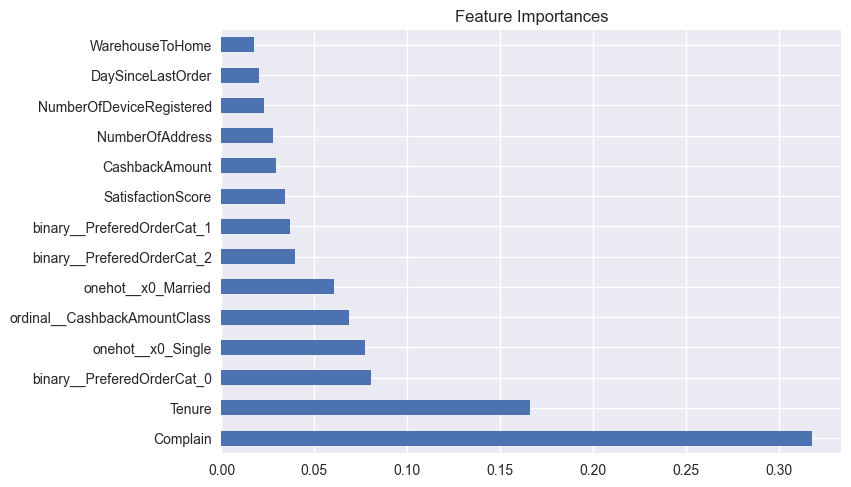

In [325]:
coef1 = pd.Series(best_model[2].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Dari data diatas dapat dilihat faktor mana yang mempengaruhi potensi pelanggan churn dan model machine learning. Fitur yang paling penting adalah complain, selanjutnya adalah masa tenure pelanggan, dan kategori yang disukai pelanggan bulan lalu. Analisa dapat ditingkatkan dengan melakukan feature selection atau kombinasi dari fitur-fitur yang berpengaruh untuk mengurangi kompleksitas model dan dibandingkan dengan model terbaik yang sekarang. 

Selain itu faktor-faktor tersebut juga bisa menjadi insight untuk bisnis, dimana perusahaan harus menerima feedback dari pelanggan yang melakukan complain dan menindak-lanjuti complain tersebut, baik itu dari platform e-commerce maupun marketplace yang terdaftar diplatform. Selain itu perusahaan dapat meningkatkan retensi pelanggan dengan memberi promo-promo menarik yang berkelanjutan, seperti apabila adanya subscription. 

### Model Akhir

Export model terbaik dengan pickle format sav

In [330]:
# Export model
best_model = xgb_grid.best_estimator_
Churn_model = best_model.fit(x_train, y_train)
pickle.dump(Churn_model, open('Model_final.sav', 'wb'))

Dalam penggunaan model, terdapat beberapa hal dan langkah yang dapat diperhatikan, yaitu sebelum menggunakan model data dapat melewati beberapa proses yang sudah dibuat:
* Menghapus data duplikat
* Melakukan drop outlier dengan data kurang dari 1% untuk kolom Tenure dan WarehouseToHome
* Melakukan binning kolom CashbackAmount
* Melakukan handling missing value
* Menggunakan model untuk melihat prediksi pelanggan berpotensi churn atau tidak

In [327]:
# Functions
def duplikat(data):
    data.drop_duplicates(inplace=True)

def outlier(data,features):
    for i in range(0, len(features)):
        Q1 = data[features[i]].quantile(0.25)
        Q3 = data[features[i]].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound =  Q1 - (1.5 * IQR)
        upper_bound =  Q3 + (1.5 * IQR)
        condition = (data[features[i]]< lower_bound) | (data[features[i]]> upper_bound)
        outlier = data.loc[condition, features[i]].count()
        PersentaseOutlier = outlier/data[features[i]].count()*100
        if PersentaseOutlier <= 1:
            data.drop(data[data[features]>upper_bound].index,inplace=True)

def binning(data,kolomcashback):
    bin_labels= ['Sangat Kecil', 'Kecil', 'Sedang', 'Besar', 'Sangat Besar']
    data['CashbackAmountClass']= pd.cut(data['kolomcashback'], 5,labels = bin_labels)

def imputation(data, cont_features):
    imputerCont = IterativeImputer(random_state=0, missing_values=np.nan)
    imputerCont.fit(data[cont_features])
    data[cont_features] = imputerCont.transform(data[cont_features])
    return data

def pred(data):
    Churn = pickle.load(open('Model_final.sav', 'rb'))
    Churn_pred = Churn.predict(data.drop(columns='Churn'))
    data['Churn_pred'] = Churn_pred
    return data.head()

## Conclusion and Recommendation

### Kesimpulan

In [328]:
print('Classification Report Tuned XGBoost : \n', report_tuned)

Classification Report Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       546
           1       0.74      0.70      0.72       107

    accuracy                           0.91       653
   macro avg       0.84      0.83      0.83       653
weighted avg       0.91      0.91      0.91       653



Berdasarkan hasil diatas dapat disimpulkan bahwa dengan prediksi menggunakan model yang sudah dibuat, model dapat mengetahui 95% pelanggan yang tidak churn dan 70% pelanggan yang churn berdasarkan recall. Selain itu model memiliki kemungkinan prediksi benar untuk pelanggan yang akan churn sebesar 74%. Maka masih ada pelanggan yang churn dan diprediksi sebagai tidak churn sebesar 4%. 
  
Bila seandainya biaya mempertahankan pelanggan 10$ dan biaya mendapatkan pelanggan baru 40$, dan terdapat 3264 pelanggan dimana pelanggan yang churn 533 orang dan yang tidak churn 2731 orang, maka kurang lebih perhitungannya adalah sebagai berikut:  
  
*Tanpa Model* (Semua pelanggan diberikan penawaran):
- Total Biaya => 3264 * 10 = 32.640 USD
- Total pelanggan churn yang ditemukan => 533 orang
- Total pelanggan churn yang tidak ditemukan => 0 orang
- Total pelanggan tidak churn yang ditemukan => 2731 orang
- Total pelanggan tidak churn yang tidak ditemukan => 0 orang
- Biaya yang terbuang => 2731 x 10 = 27.310 USD

*Dengan Model* (Penawaran diberikan sesuai prediksi):
- Total Biaya => (533 x 0.70) x 10= 3.731 USD
- Total pelanggan churn yang ditemukan => (533x0.7)= 374 orang
- Total pelanggan churn yang tidak ditemukan => 159 + (2731 x 0.04) = 268 orang
- Total pelanggan tidak churn yang ditemukan => (2731 x 0.95)= 2595 orang
- Total pelanggan tidak churn yang tidak ditemukan => 136 orang
- Biaya yang terbuang => (136x 10USD) + (268 X 40USD) = 1.360 + 10.720 = 12.080 USD
- Jumlah penghematan => 27.310 - 12.080 = 15.230USD 

Dengan adanya bantuan model, perusahan e-commerce dapat menghemat biaya yang cukup besar dengan melakukan pemasaran yang lebih tepat sasaran.

Selain itu, berdasarkan analisa faktor yang berpengaruh dengan customer churn adalah complain dan masa tenure pelanggan. Hal tersebut harus diperhatikan, apabila pelanggan melakukan complain dan semakin kecil masa tenure pelanggan, ada potensi customer churn. 

### Rekomendasi

Adapun beberapa rekomendasi yang dapat diberikan terkait sisi bisnis dan model:  
  
* Business:
    - Memberikan penawaran pada pelanggan dengan masa tenure 0-2 bulan yang berpotensi churn, berupa promo, cashback, atau subscription sehingga pelanggan lebih tertarik untuk menggunakan platform e-commerce terus-menerus
    - Memperhatikan complain yang diberikan pelanggan, baik itu dari segi kemudahan penggunaan platform e-commerce, memperbanyak variasi produk dengan mencari mitra, mengoptimalkan live chat antar pelanggan-pembeli dan pelanggan-support centre, memonitor dan memberi pelatihan kepada marketplace yang terdaftar sehingga memberikan service dan produk yang memuaskan. 
    - Memberikan penawaran pemotongan ongkos kirim pada potensi customer churn yang memiliki jarak antar warehouse dan rumah yang jauh
    - Menggunakan model machine learning yang telah dibuat sebagai solusi untuk menentukan strategi pemasaran yang tepat sasaran     
    
     
* Model:
    - Saat penarikan data, data diharapkan memiliki kolom customer ID untuk memastikan tidak adanya data yang duplikat, serta memastikan data yang didapat tidak ada missing value
    - Adanya kolom dengan fitur lain yang berhubungan langsung dengan servis yang perusahaan e-commerce berikan dan transaksi pelanggan, seperti berapa lama pengiriman produk, ketepatan waktu pengiriman, kolom customer service helpful atau tidak, dan sebagainya
    - Model dapat ditingkatkan dengan melakukan tuning hyperparameter dengan nilai yang sudah didapat sebagai referensi, atau menambahkan parameter lain
    - Meningkatkan nilai recall dengan tuning threshold ROC-AUC
    - Memilah fitur sesuai dengan feature importances dan melakukan trial kombinasi fitur yang berpengaruh untuk mengurangi kompleksitas model

Dengan adanya rekomendasi diatas, diharapkan perusahaan e-commerce dapat menurunkan biaya marketing dan diharapkan dapat meningkatkan profit dengan adanya pelanggan loyal.